# 阿里云天池比赛

工业蒸汽量预测比赛练习

In [1]:
# 引入必要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 数据导入

使用pandas读取数据。

本次的csv文件采用`TAB`作为分割符。

In [2]:
# 分割符
SEP_FLG = '\t'

df_train = pd.read_csv('./data/zhengqi_train.txt',sep=SEP_FLG)
df_test = pd.read_csv('./data/zhengqi_test.txt',sep=SEP_FLG)

## 数据概览

总体上看一下数据集的状况

In [3]:
# 训练集
display(df_train.head())
# 测试集
display(df_test.head())

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   

     V29    V30    V31    V32    V33    V34    V35    V36    V37  target  
0  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175  
1 -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676  
2 -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633  
3  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206  
4  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384  

[5 rows x 39 columns]

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904  ...   
1  0.148  0.489 -0.247 -0.049  0.122 -0.201  0.487  0.493 -0.127  0.904  ...   
2 -0.166 -0.062 -0.311  0.046 -0.055  0.063  0.485  0.493 -0.227  0.904  ...   
3  0.102  0.294 -0.259  0.051 -0.183  0.148  0.474  0.504  0.010  0.904  ...   
4  0.300  0.428  0.208  0.051 -0.033  0.116  0.408  0.497  0.155  0.904  ...   

     V28    V29    V30    V31    V32    V33    V34    V35    V36    V37  
0 -0.449  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388  
1 -0.443  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294  0.104  
2 -0.458 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373  0.569  
3 -0.456 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666  0.391  
4 -0.458 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140 -0.497  

[5 rows x 38 columns]

注意一下特征数（列数）是否相同。本例中，训练集比测试集多了一列`target`，这个是标签列，数据无误。

下面再使用info查看训练集和测试集的整体统计信息。

In [5]:
# 训练集
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

训练集信息:
- 总共2888条数据
- 下标范围：[0, 2887]
- 39列数据
- 基本上都是`float64`类型
- 内存占用：880.1KB

In [6]:
# 测试集
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

测试集信息:
- 总共1925条数据
- 下标范围：[0, 1924]
- 38列数据
- 基本上都是`float64`类型
- 内存占用：571.6KB

## 数据预处理

内存压缩

In [7]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
                    
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

df_train = reduce_mem_usage(df_train)
df_test = reduce_mem_usage(df_test)

Memory usage after optimization is: 0.21 MB
Decreased by 75.0%
Memory usage after optimization is: 0.14 MB
Decreased by 75.0%


## 数据探索

通过各种数据可视化工具直观的体验数据，对特征进行初步筛选。

### 判断有无重复数据

判断数据集的构成情况，1对1，还是1对多

In [10]:
# 本赛题中没有有关id的字段，故省略
# df_train['id'].nunique() == df_train.shape[0]
# df_test['V1'].nunique() == df_test.shape[0]

### 判断训练集和验证集的id都是无重复的

通过主键合并以后，观察是否所有的id都唯一

In [26]:
# 本赛题中没有有关id的字段，故省略
# df_train['V1'].nunique() + df_test['V1'].nunique() == len(set(np.append(df_train['V1'].values, df_test['V1'].values)))

### 数据分布情况 - 箱形图

通过箱形图，观察四分位数和数据的集中情况。

In [7]:
# 获取数据的列名称
column = df_train.columns.tolist()[:39]
', '.join(column)

'V0, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, target'

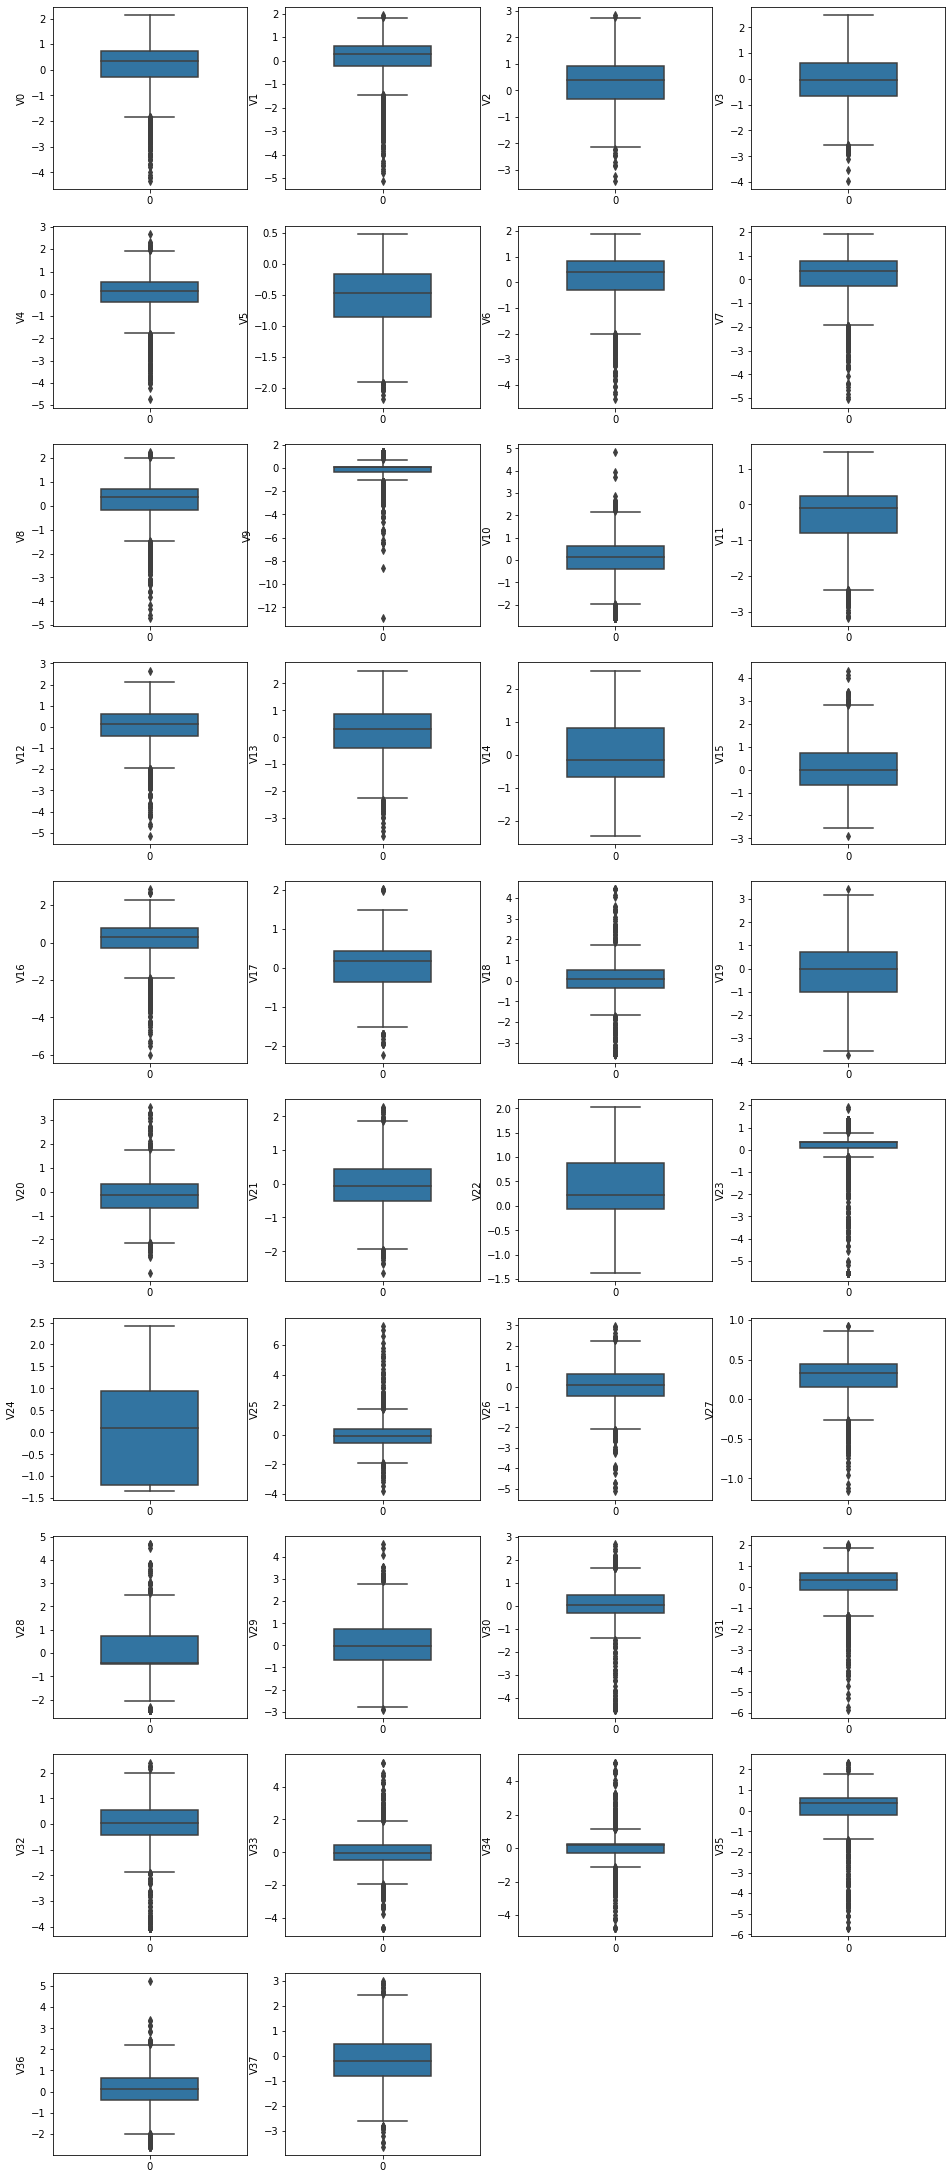

In [8]:
# 不包含 target 列
plt_rows = len(column) - 1
plt_cols = 4

plt.figure(figsize=(4 * plt_cols, 4 * plt_rows))

for i in range(plt_rows):
    plt.subplot(plt_rows, plt_cols, i + 1)
    sns.boxplot(data=df_train[column[i]], orient='v', width=0.5, whis=1.5)
    plt.ylabel(column[i])

plt.show()

#### 异常值分析

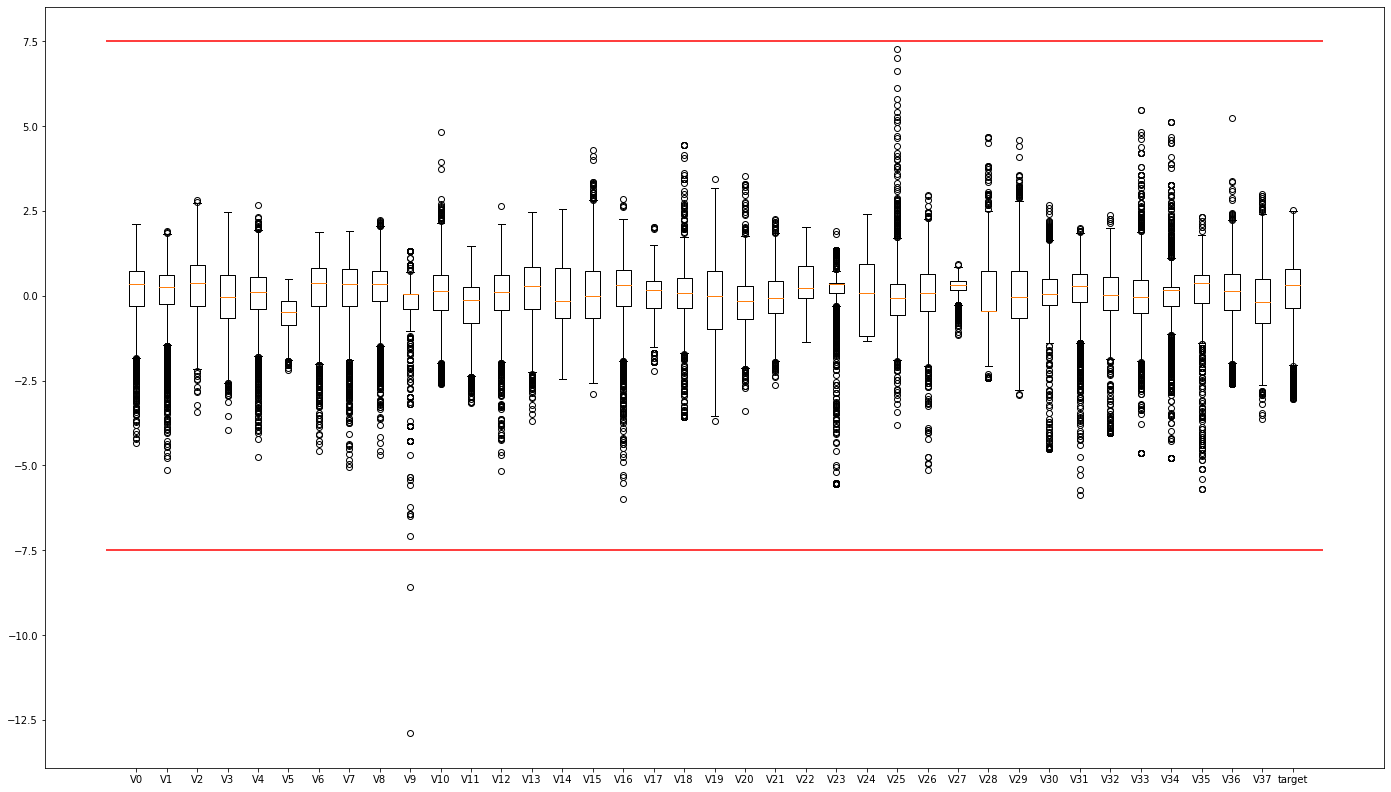

In [9]:
plt.figure(figsize=(24, 14))
plt.boxplot(x=df_train.values, labels=df_train.columns)
# TODO 这里为什么是在[-7.5, 7.5]划分出一个区间？
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

把训练集和测试集中的异常值删除。

In [10]:
# backup row amounts
train_before_clean = df_train.shape[0]
test_before_clean = df_test.shape[0]

df_train = df_train[df_train['V9']>-7.5]
df_test = df_test[df_test['V9']>-7.5]
display(df_train.describe())
display(df_test.describe())

print('remove train data {} rows.'.format(train_before_clean - df_train.shape[0]))
print('remove test  data {} rows.'.format(test_before_clean  - df_test.shape[0]))

V0           V1           V2           V3           V4  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.123718     0.056854     0.290283    -0.068359     0.012260   
std       0.928223     0.941406     0.911133     0.970703     0.888184   
min      -4.335938    -5.121094    -3.419922    -3.955078    -4.742188   
25%      -0.291992    -0.224243    -0.310059    -0.652588    -0.385010   
50%       0.359497     0.272949     0.385986    -0.045013     0.109497   
75%       0.726074     0.599121     0.918701     0.623535     0.549805   
max       2.121094     1.917969     2.828125     2.457031     2.689453   

                V5           V6           V7           V8           V9  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean     -0.559082     0.183350     0.116272     0.178101    -0.162109  ...   
std       0.518066     0.918457     0.956055     0.895508     0.911133  ...   
min      -2.181641    -4.574219    -5.046875    -4.691406    -7.070312  ...   
25%      -0.853027    -0.310059    -0.294922    -0.158783    -0.389893  ...   
50%      -0.466064     0.388428     0.344971     0.362061     0.041992  ...   
75%      -0.154053     0.831787     0.782959     0.726074     0.041992  ...   
max       0.489014     1.894531     1.917969     2.244141     1.334961  ...   

               V29          V30          V31          V32          V33  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.097046     0.058594     0.127563     0.023621     0.008308   
std       1.061523     0.894531     0.873535     0.896973     1.006836   
min      -2.912109    -4.507812    -5.859375    -4.054688    -4.628906   
25%      -0.664062    -0.281982    -0.170776    -0.405029    -0.499023   
50%      -0.023003     0.054489     0.299561     0.039993    -0.040009   
75%       0.745117     0.488037     0.634766     0.557129     0.461914   
max       4.578125     2.689453     2.013672     2.394531     5.464844   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  
mean      0.006973     0.198486     0.030106    -0.131958     0.127441  
std       1.002930     0.985352     0.970215     1.015625     0.983398  
min      -4.789062    -5.695312    -2.607422    -3.630859    -3.044922  
25%      -0.290039    -0.199707    -0.412842    -0.798584    -0.347412  
50%       0.160034     0.364014     0.136963    -0.186035     0.313965  
75%       0.272949     0.602051     0.643799     0.492920     0.793701  
max       5.109375     2.324219     5.238281     3.000000     2.537109  

[8 rows x 39 columns]

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.184448    -0.083923    -0.434814     0.101685    -0.019165   
std       1.073242     1.076172     0.969727     1.035156     1.147461   
min      -4.812500    -5.488281    -4.281250    -3.275391    -4.921875   
25%      -0.664062    -0.450928    -0.978027    -0.644043    -0.497070   
50%       0.065002     0.194946    -0.267090     0.219971     0.117981   
75%       0.548828     0.588867     0.278076     0.792969     0.609863   
max       2.099609     2.119141     1.946289     2.603516     4.476562   

                V5           V6           V7           V8           V9  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.837891    -0.273926    -0.174072    -0.266846     0.255127  ...   
std       0.962891     1.053711     1.040039     1.085938     1.014648  ...   
min      -1.167969    -5.648438    -5.625000    -6.058594    -6.785156  ...   
25%       0.122009    -0.731934    -0.508789    -0.774902    -0.389893  ...   
50%       0.437012    -0.081970     0.018005    -0.004002     0.400879  ...   
75%       1.927734     0.457031     0.515137     0.481934     0.903809  ...   
max       3.175781     1.528320     1.393555     2.408203     1.765625  ...   

               V28          V29          V30          V31          V32  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.206909    -0.146484    -0.083191    -0.191650    -0.030777   
std       1.064453     0.880371     1.125977     1.138672     1.129883   
min      -2.435547    -2.412109    -4.507812    -7.699219    -4.058594   
25%      -0.452881    -0.817871    -0.339111    -0.476074    -0.471924   
50%      -0.445068    -0.198975     0.010002     0.099976     0.155029   
75%      -0.434082     0.468018     0.447021     0.470947     0.626953   
max       4.656250     3.021484     3.138672     1.427734     2.298828   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.011414    -0.009979    -0.296875    -0.046265     0.195679  
std       0.989746     0.995117     0.947266     1.041016     0.940430  
min      -4.628906    -4.789062    -7.476562    -2.607422    -3.345703  
25%      -0.459961    -0.290039    -0.349121    -0.592773    -0.431885  
50%      -0.040009     0.160034    -0.270020     0.083008     0.151978  
75%       0.418945     0.272949     0.364014     0.650879     0.796875  
max       5.464844     5.109375     1.670898     2.861328     3.021484  

[8 rows x 38 columns]

remove train data 2 rows.
remove test  data 0 rows.


### NaN空值补偿

检查是否存在缺失值。

In [11]:
# 检查每一个特征的缺失情况

#提取df_train中的特征标签，并将起转换成列表形式
feature_list=list(df_train.columns)
#为方便之后使用，去掉列表中被一并提取出来的target标签，确保仅留特征标签
feature_list.remove('target')

for c in feature_list:
    print('feature: {}, lost rate {}'.format(c, (df_train.shape[0] - df_train[c].count()) / df_train.shape[0]))    

feature: V0, lost rate 0.0
feature: V1, lost rate 0.0
feature: V2, lost rate 0.0
feature: V3, lost rate 0.0
feature: V4, lost rate 0.0
feature: V5, lost rate 0.0
feature: V6, lost rate 0.0
feature: V7, lost rate 0.0
feature: V8, lost rate 0.0
feature: V9, lost rate 0.0
feature: V10, lost rate 0.0
feature: V11, lost rate 0.0
feature: V12, lost rate 0.0
feature: V13, lost rate 0.0
feature: V14, lost rate 0.0
feature: V15, lost rate 0.0
feature: V16, lost rate 0.0
feature: V17, lost rate 0.0
feature: V18, lost rate 0.0
feature: V19, lost rate 0.0
feature: V20, lost rate 0.0
feature: V21, lost rate 0.0
feature: V22, lost rate 0.0
feature: V23, lost rate 0.0
feature: V24, lost rate 0.0
feature: V25, lost rate 0.0
feature: V26, lost rate 0.0
feature: V27, lost rate 0.0
feature: V28, lost rate 0.0
feature: V29, lost rate 0.0
feature: V30, lost rate 0.0
feature: V31, lost rate 0.0
feature: V32, lost rate 0.0
feature: V33, lost rate 0.0
feature: V34, lost rate 0.0
feature: V35, lost rate 0.0
fe

### 数据分布情况 - 岭回归获取异常值

通过岭回归自动找到异常值。

R2= 0.8894654026524649
mse= 0.10679776830725084
-----------------------------------
mean of residuals: -9.232623905406708e-17
std of residuals: 0.32685591106453205
-----------------------------------
31 outliers:
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


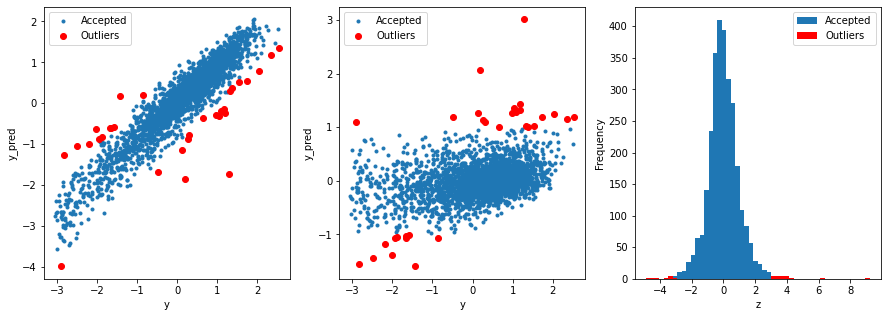

In [12]:
# function to detect outliers based on the predictions of a model 
def find_outliers(model, X, y, sigma=3): # X:feature y:label  return: 异常值的index
    # predict y values using model
    # try:
    #     y_pred = pd.Series(model.predict(X), index=y.index)
    # # if predicting failed, try fitting the model first
    # except:
    #     model.fit(X, y)
    #     y_pred = pd.Series(model.predict(X), index=y.index)

        
    model.fit(X, y)
    y_pred = pd.Series(model.predict(X), index=y.index)

        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    # calculate a statistic, define outliers to be where z >sigma 这里是标准化的计算公式
    z = (resid - mean_resid) / std_resid
    outliers = z[abs(z) > sigma].index
    
    # print and plot the results 
    print('R2=', model.score(X,y))
    print('mse=', mean_squared_error(y,y_pred))
    print('-----------------------------------')
    
    print('mean of residuals:', mean_resid)
    print('std of residuals:' , std_resid)
    print('-----------------------------------')
    
    print(len(outliers),'outliers:')
    print(outliers.tolist())
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y ,y_pred, '.')
    plt.plot(y.loc[outliers], y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('y')
    plt.ylabel('y_pred')    
    
    ax_132 = plt.subplot(1,3,2)
    plt.plot(y ,y - y_pred, '.')
    plt.plot(y.loc[outliers], y.loc[outliers] - y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    ax_133 = plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax= ax_133)
    z.loc[outliers].plot.hist(color='r', bins=50, ax=ax_133)
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('z')
    
    # plt.savefig('outliers.png')
    plt.show()
    
    return outliers

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 注意，这里的 X_train 的取值是除了最后一列的所有特征
X_train = df_train.iloc[:,0:-1]
y_train = df_train.iloc[:,-1]

outliers = find_outliers(Ridge(), X_train, y_train)

R2= 0.8894654026524649
mse= 0.10679776830725084
-----------------------------------
mean of residuals: -9.232623905406708e-17
std of residuals: 0.32685591106453205
-----------------------------------
31 outliers:
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


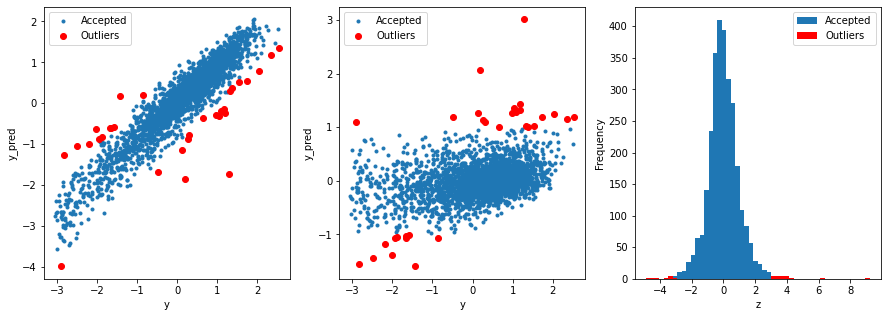

drop:  [321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]
loop: 19
R2= 0.9073929319180636
mse= 0.08769671517435589
-----------------------------------
mean of residuals: 6.999654796235663e-18
std of residuals: 0.29618818819305187
-----------------------------------
21 outliers:
[693, 696, 776, 843, 1040, 1069, 1085, 1086, 1296, 1537, 1619, 1829, 1921, 1972, 2003, 2159, 2160, 2264, 2533, 2676, 2697]


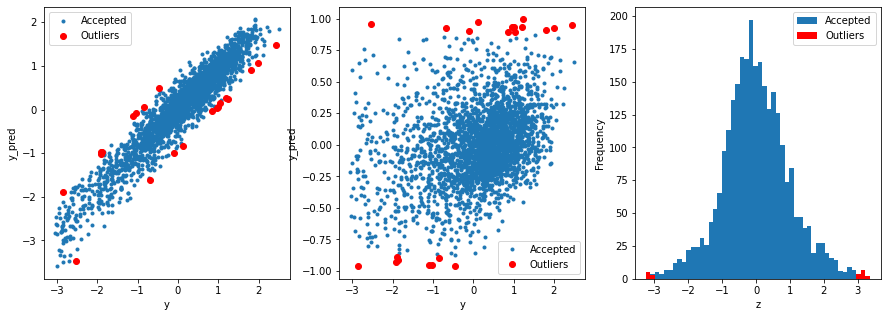

drop:  [693, 696, 776, 843, 1040, 1069, 1085, 1086, 1296, 1537, 1619, 1829, 1921, 1972, 2003, 2159, 2160, 2264, 2533, 2676, 2697]
loop: 18
R2= 0.9125875386935502
mse= 0.08185260286689715
-----------------------------------
mean of residuals: 9.558730346102266e-18
std of residuals: 0.28614942848094954
-----------------------------------
7 outliers:
[789, 1039, 1412, 2182, 2242, 2665, 2670]


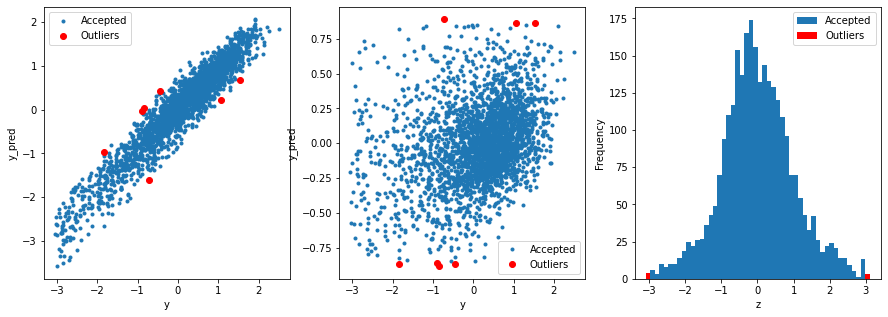

drop:  [789, 1039, 1412, 2182, 2242, 2665, 2670]
loop: 17
R2= 0.9143153552808492
mse= 0.08015272333973268
-----------------------------------
mean of residuals: -1.979315190700668e-17
std of residuals: 0.2831626492765285
-----------------------------------
1 outliers:
[2655]


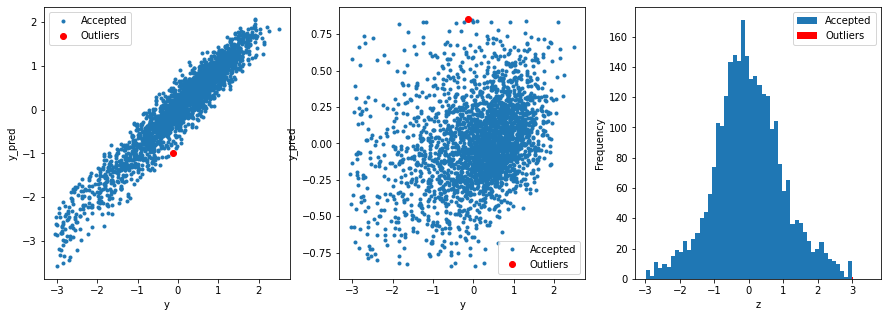

drop:  [2655]
loop: 16
R2= 0.9145933658557079
mse= 0.07991884587046663
-----------------------------------
mean of residuals: -3.300025975531251e-18
std of residuals: 0.28274924531713946
-----------------------------------
1 outliers:
[914]


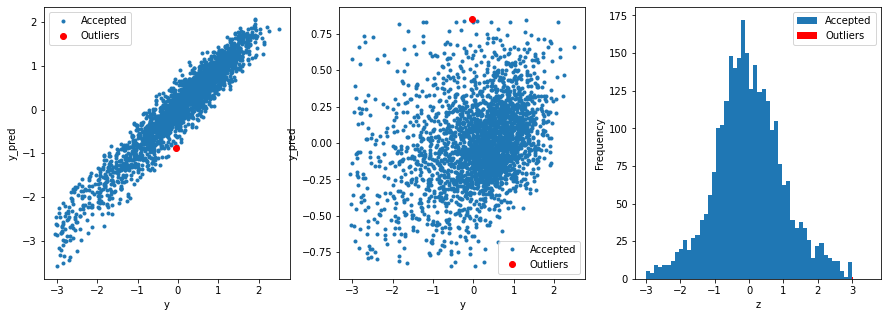

drop:  [914]
loop: 15
R2= 0.9148697843309435
mse= 0.07969046794538004
-----------------------------------
mean of residuals: -1.1003980421063498e-17
std of residuals: 0.28234497861589464
-----------------------------------
1 outliers:
[2805]


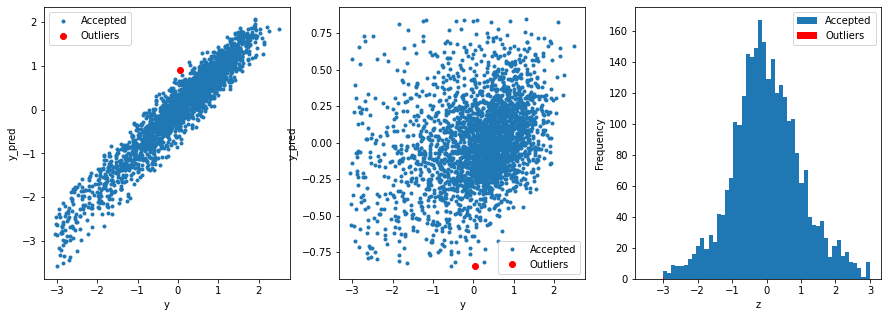

drop:  [2805]
loop: 14
R2= 0.9151502179074074
mse= 0.07945588308369717
-----------------------------------
mean of residuals: 2.8305969466363763e-18
std of residuals: 0.2819291205007257
-----------------------------------
1 outliers:
[105]


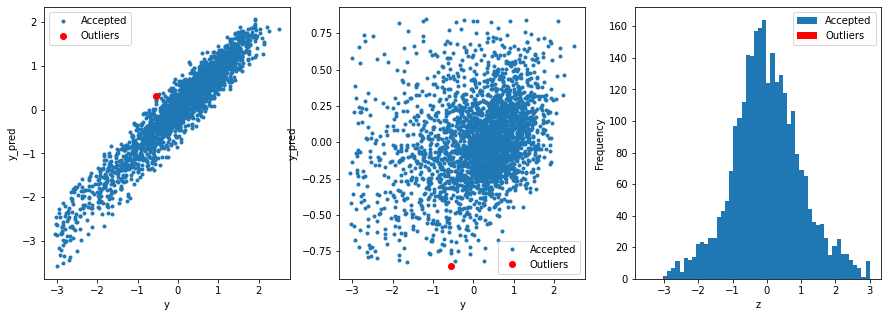

drop:  [105]
loop: 13
R2= 0.9154095010763157
mse= 0.07921797644827318
-----------------------------------
mean of residuals: -3.146221819695803e-17
std of residuals: 0.28150674595889674
-----------------------------------
2 outliers:
[674, 2593]


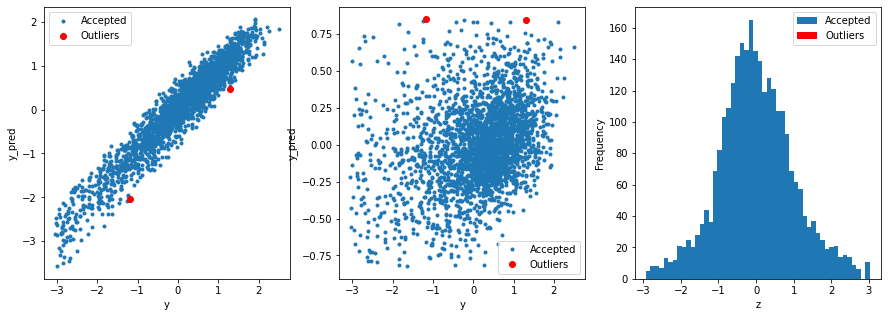

drop:  [674, 2593]
loop: 12
R2= 0.9158614557200786
mse= 0.0787579372048888
-----------------------------------
mean of residuals: 5.604245257235813e-17
std of residuals: 0.28068819987918153
-----------------------------------
1 outliers:
[1515]


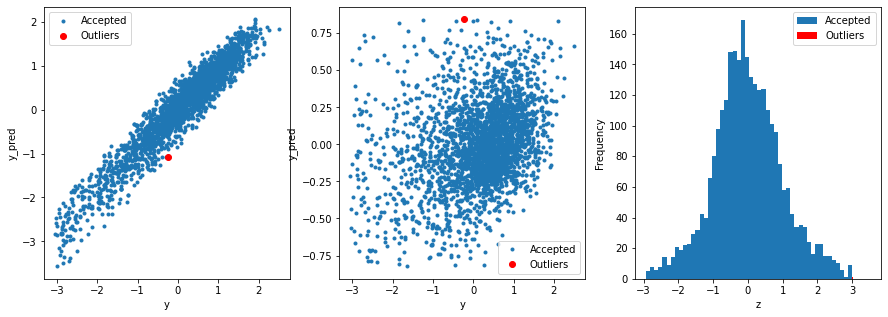

drop:  [1515]
loop: 11
R2= 0.9161292936254652
mse= 0.07852849631881899
-----------------------------------
mean of residuals: -7.023538567132196e-17
std of residuals: 0.28027906304547506
-----------------------------------
2 outliers:
[1510, 1999]


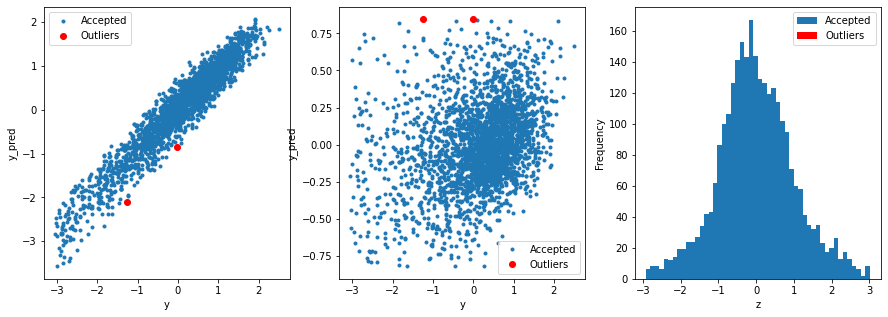

drop:  [1510, 1999]
loop: 10
R2= 0.9166486211695566
mse= 0.0780684831627509
-----------------------------------
mean of residuals: 3.498502646796093e-17
std of residuals: 0.2794569671779659
-----------------------------------
2 outliers:
[875, 1046]


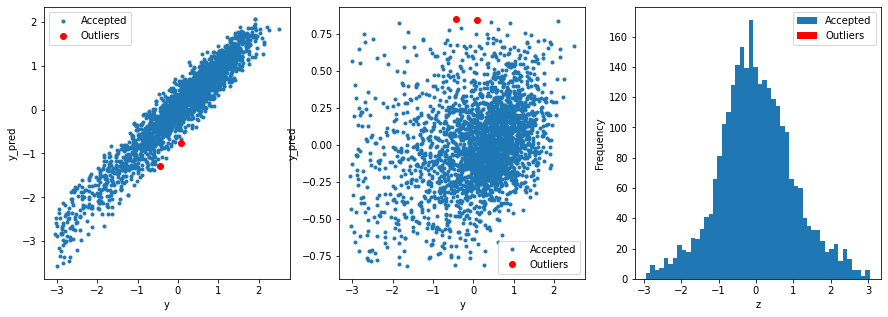

drop:  [875, 1046]
loop: 9
R2= 0.9171805501881197
mse= 0.07760664761427706
-----------------------------------
mean of residuals: 1.636948152785387e-16
std of residuals: 0.27862917396287523
-----------------------------------
2 outliers:
[805, 1460]


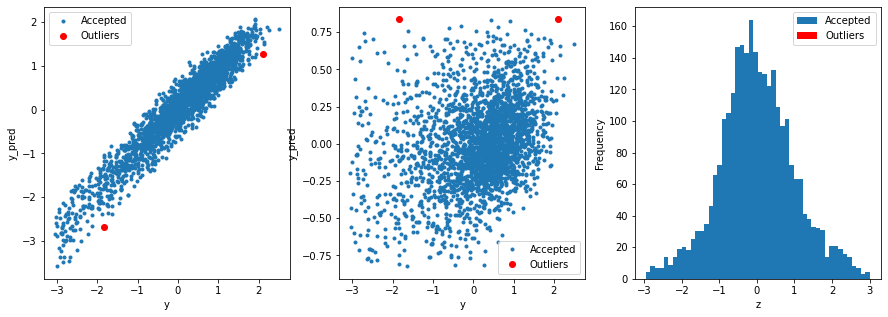

drop:  [805, 1460]
loop: 8
R2= 0.9174769241174918
mse= 0.07715678425533506
-----------------------------------
mean of residuals: -6.281005882030026e-17
std of residuals: 0.27782046883270123
-----------------------------------
0 outliers:
[]


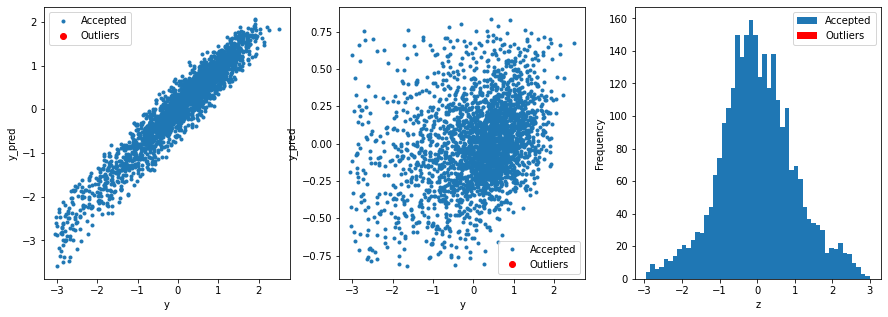

drop:  []
total dropped 72 lines.


In [13]:
# 以循环方式按行删除所有异常数据， 最多 20 次循环
max_loop = 20
total_drop = 0
while True:

    X_train = df_train.iloc[:,0:-1]
    y_train = df_train.iloc[:,-1]
    outliers = find_outliers(Ridge(), X_train, y_train)
    outliers = outliers.to_list()
    print('drop: ', outliers)
    df_train.drop(outliers, axis=0, inplace=True)
    
    if max_loop <= 0 or 0 == len(outliers):
        break

    max_loop -= 1
    total_drop += len(outliers)
    print('loop:', max_loop)

print('total dropped {} lines.'.format(total_drop))

### 数据分布情况 - 直方图, Q-Q图, KDE图

Q-Q图是值数据的分位数和正态分布的分位数对比参照的图。如果数据符合正态分布，则所有点都会落在直线上。绘制Q-Q图查看统计分布是否近似于正态分布。

KDE（Kernel Density Estimation, 核密度估计）可以理解为是对直方图的加窗平滑。通过绘制KDE图，可以查看并对比`训练集`和`测试集`中特征变量的分布情况，发现两个数据集中分布不一致的特征变量。

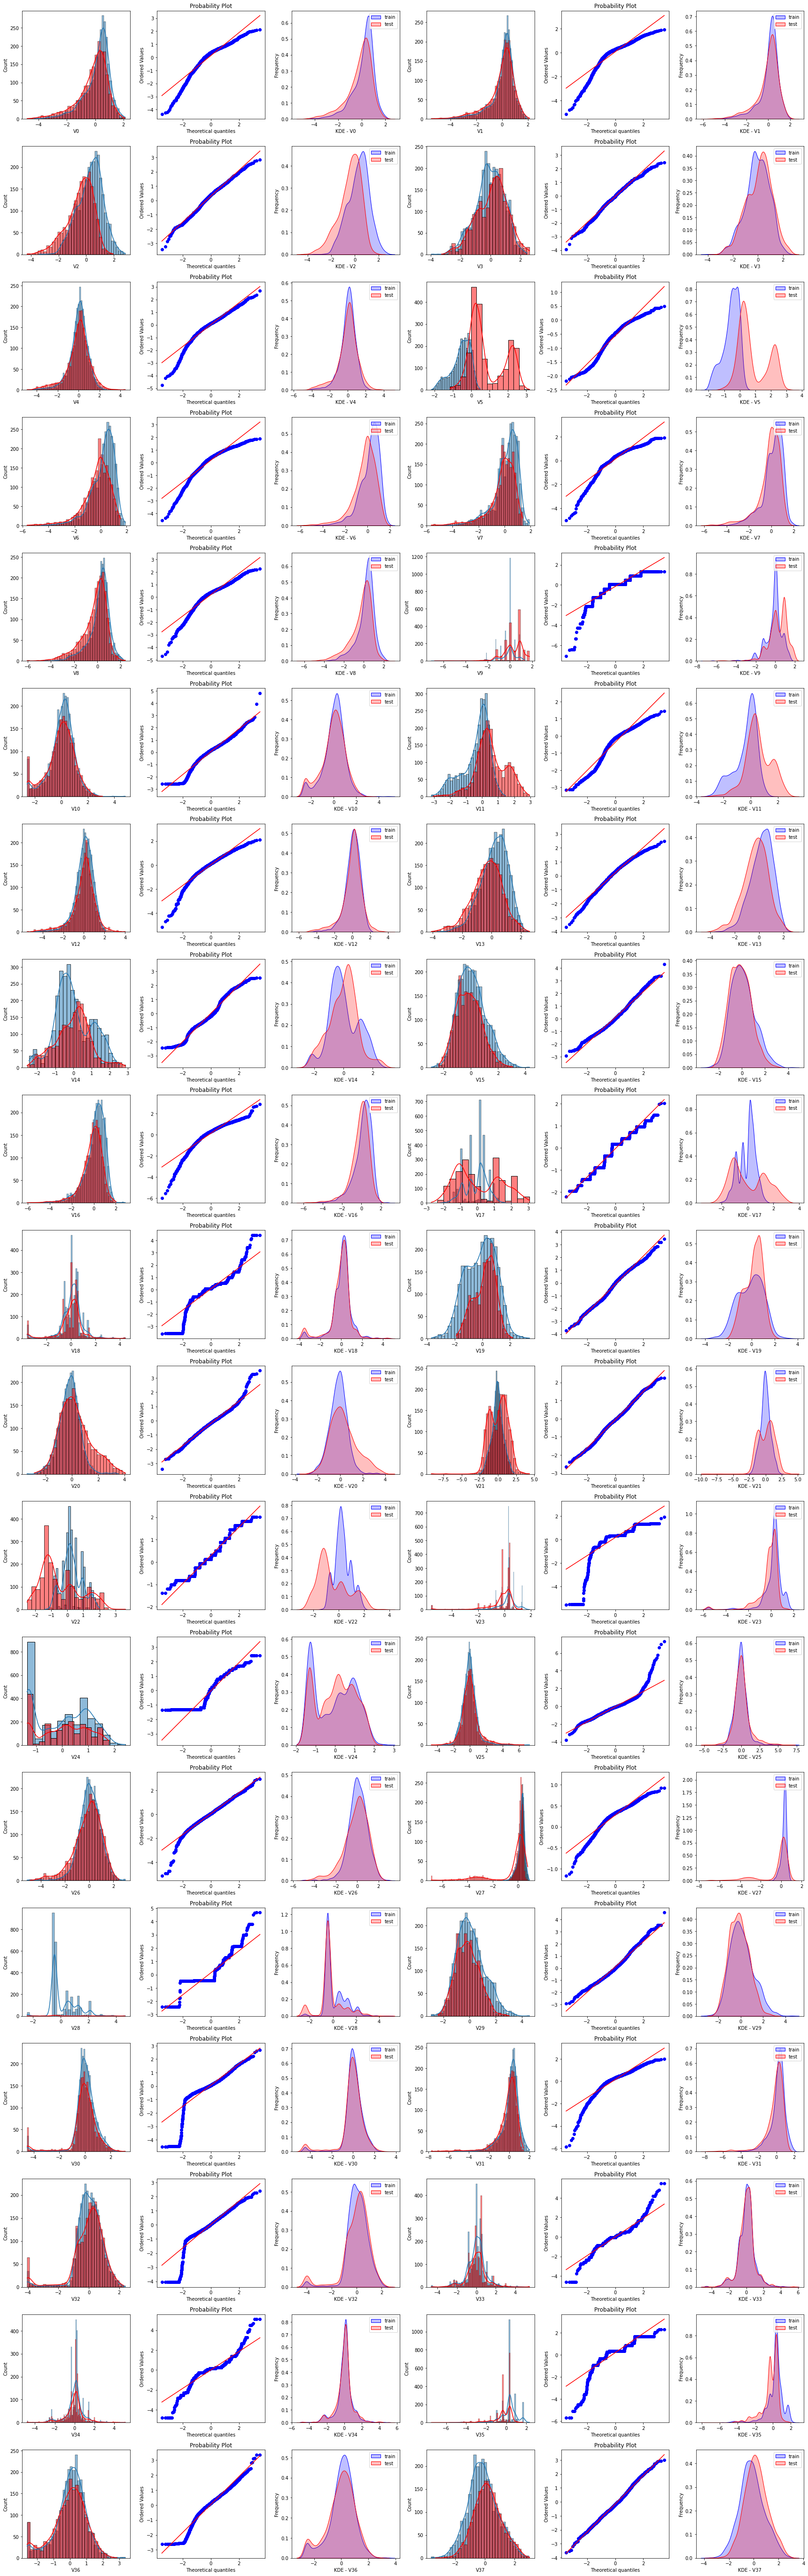

In [14]:
from scipy import stats

#提取df_train中的特征标签，并将起转换成列表形式
feature_list=list(df_train.columns)
#为方便之后使用，去掉列表中被一并提取出来的target标签，确保仅留特征标签
feature_list.remove('target')

plt_rows = len(feature_list)
plt_cols = 6
zoom_to = 1.0

plt.figure(figsize=(4 * zoom_to * plt_cols, 4 * zoom_to * plt_rows))

i = 0
for col in feature_list:
    i += 1
    plt.subplot(plt_rows, plt_cols, i)
    sns.histplot(df_train[col], kde=True)
    sns.histplot(df_test[col], kde=True, color='r')
    
    i += 1
    plt.subplot(plt_rows, plt_cols, i)
    res = stats.probplot(df_train[col], plot=plt)
    
    i += 1
    plt.subplot(plt_rows, plt_cols, i)
    ax = sns.kdeplot(df_train[col], color='b', shade=True)
    ax = sns.kdeplot(df_test[col], color='r',shade=True)
    ax.set_xlabel('KDE - ' + col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(['train','test'])
    
plt.tight_layout()
plt.show()

理想状态下，针对同一特征，训练集的数据分布曲线应该和测试集的数据分布曲线完全一致，但是这在实际过程中并不多见。

如`V0`和`V1`两个特征的分布图可以发现，虽然训练集和测试集的数据分布情况略有差异，但仍然可以认为是分布情况一致的。

而`V5`和`V17`特征图清晰的反映了数据分布不一致的情况。

同时在训练集和测试集中将数据分布不一致的特征去除

In [15]:
# 删除指定的列
drop_target = ['V5', 'V9', 'V11', 'V14', 'V17', 'V21', 'V22']
# 原书中删除的是 'V5','V9','V11','V17','V22','V28'

df_train.drop(drop_target, axis=1, inplace=True)
df_test.drop(drop_target, axis=1, inplace=True)

因为训练集和测试集的特征经过了筛选都发生了变化，为了方便之后的操作，重新提取出训练集中所有的特征标签，更新特征标签列表feature_list

In [16]:
#提取df_train中的特征标签，并将起转换成列表形式
feature_list=list(df_train.columns)
#为方便之后使用，去掉列表中被一并提取出来的target标签，确保仅留特征标签
feature_list.remove('target')

', '.join(feature_list)

'V0, V1, V2, V3, V4, V6, V7, V8, V10, V12, V13, V15, V16, V18, V19, V20, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37'

### 数据分布情况 - 线性回归关系图

线性回归关系图主要用于分析变量间的线性回归关系。

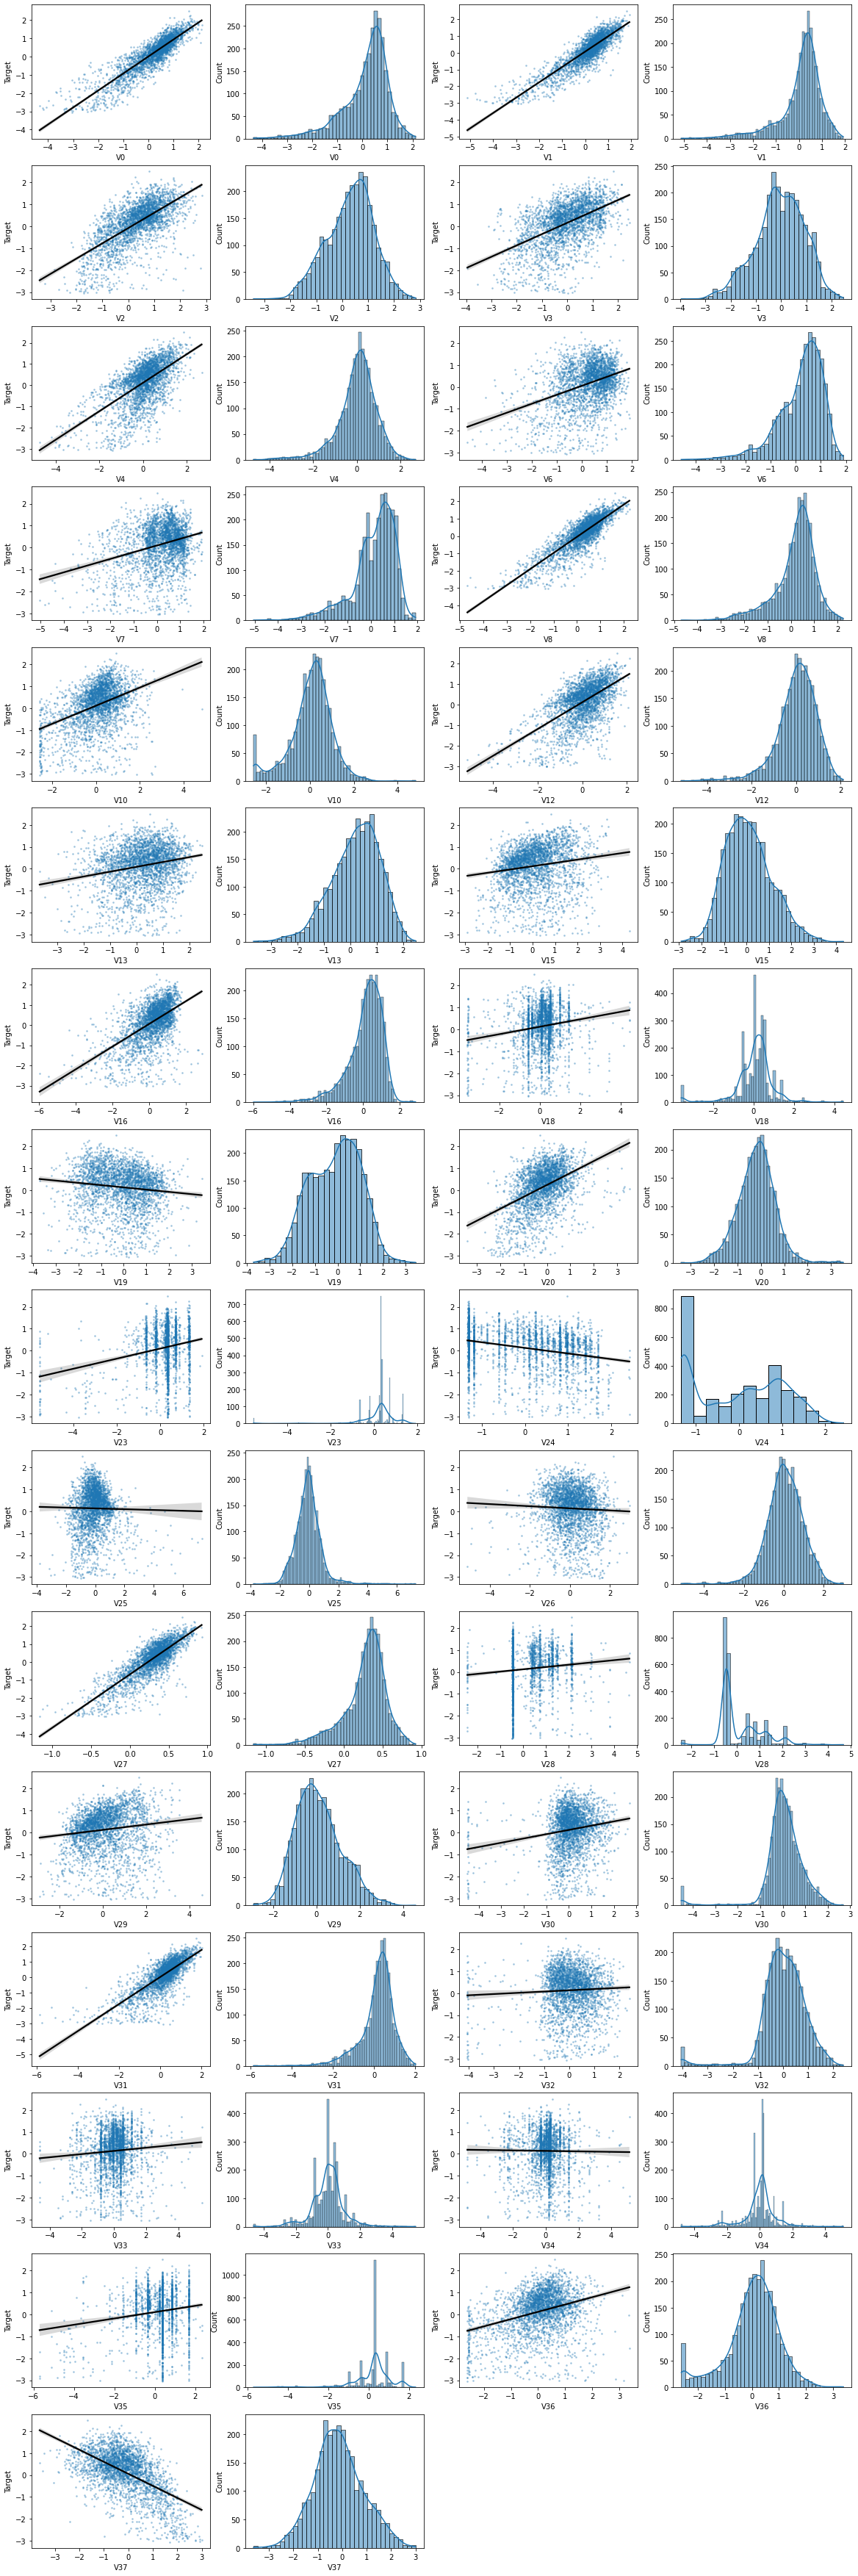

In [17]:
fcols = 4
frows = len(feature_list)
plt.figure(figsize=(5 * fcols, 4 * frows))

i = 0
for col in feature_list:
    i+=1
    ax = plt.subplot(frows, fcols, i)
    sns.regplot(x=col, y= 'target', data=df_train,
                ax=ax, scatter_kws={'marker':'.','s':3,'alpha':0.3}, line_kws={'color':'k'})
    ax.set_xlabel(col)
    ax.set_ylabel("Target")
    
    i+=1
    ax = plt.subplot(frows, fcols, i)
    sns.histplot(df_train[col].dropna(), kde=True)
    plt.xlabel(col)
    
plt.show()

## 计算相关性系数

在删除训练集和测试集中分布不一致的特征变量后，计算剩余特征变量和target变量的相关性系数。

current features:  32


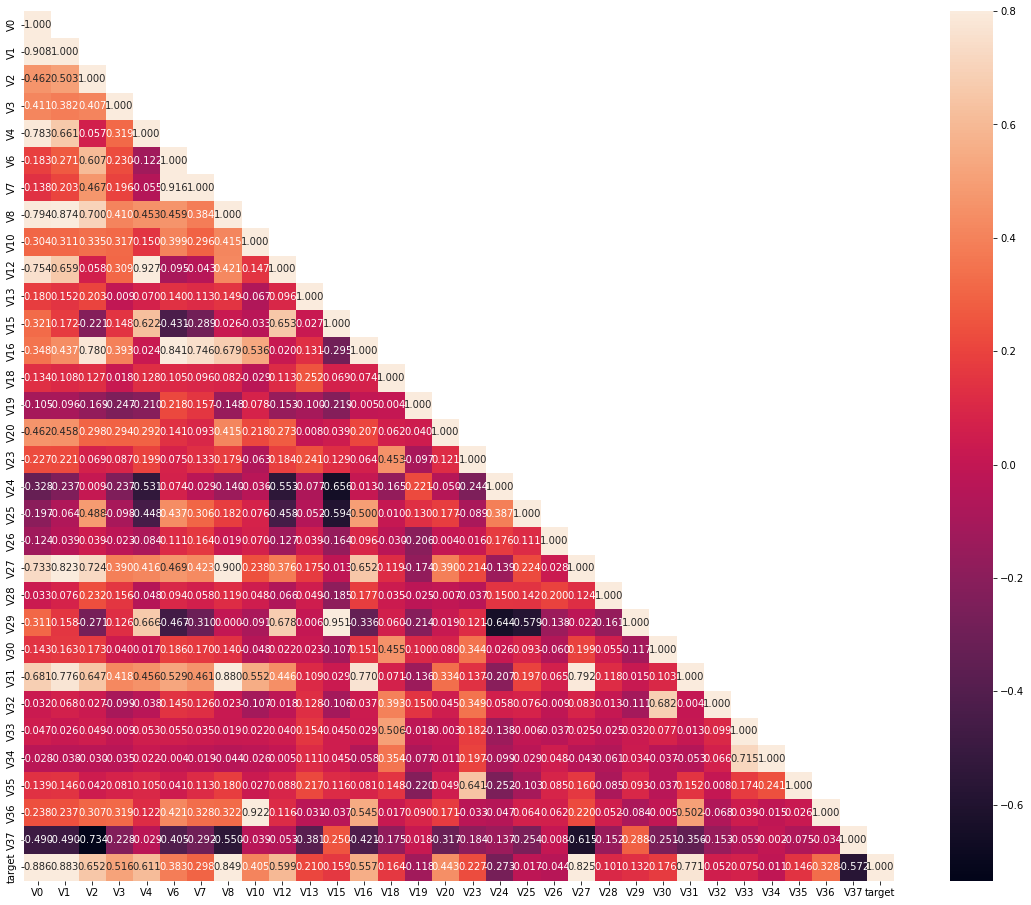

In [18]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# TODO corr()函数有参数 method='spearman'
train_corr = df_train.corr()
# train_corr

print('current features: ', len(train_corr.columns))

# 设置mask
mask = np.zeros_like(train_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# 保留对角线上的值
mask[np.eye(len(train_corr.columns), dtype=bool)] = False

ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True, mask=mask, fmt='0.3f')

这里只关注每一个特征与`target`之间的相关性。相关系数的绝对值大于0.5的为强相关性，小于0.5的为弱相关性，0附近的为没有相关性，系数为正代表正相关，系数为负代表负相关。

以可视化方法绘制特征标签与预测标签（target）的散点图，与相关系数的计算结果进行相互校对：

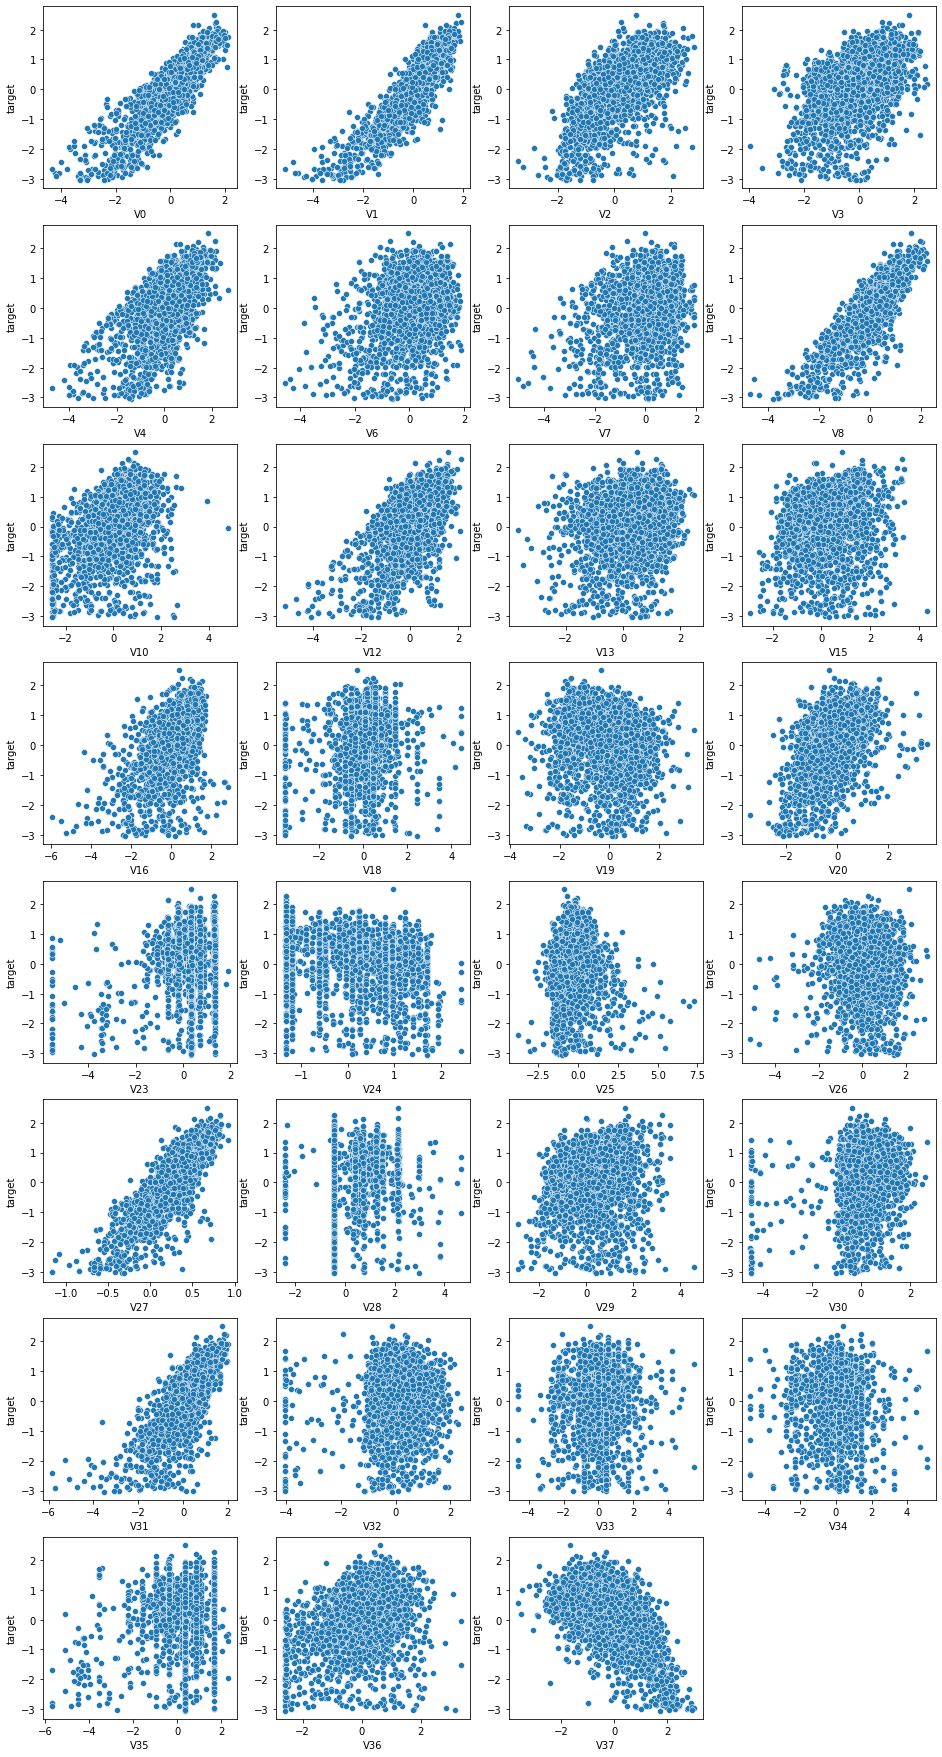

In [19]:
plt_rows = len(feature_list)
plt_cols = 4

plt.figure(figsize=(4 * plt_cols, 4 * plt_rows))

i = 0
for f in feature_list:
    i += 1
    plt.subplot(plt_rows, plt_cols, i)

    sns.scatterplot(x=df_train[f'{f}'], y=df_train['target'])

plt.show()

根据相关系数筛选特征变量。找出与target变量的相关系数大于0.1的特征变量。

current features:  27


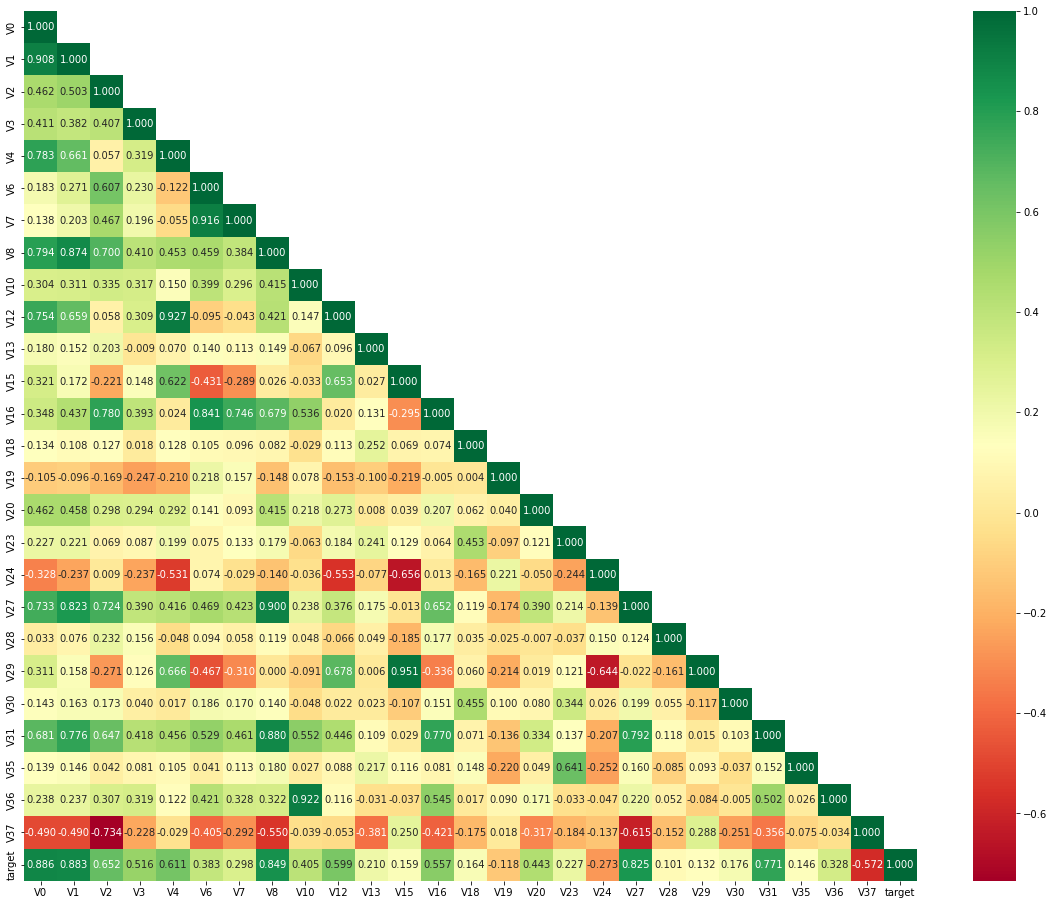

In [20]:
# 这个与之设置的越大，剩下的特征就越少
threshold = 0.1

# TODO corr()函数有参数 method='spearman'
corrmat = df_train.corr()
# 这里返回的是一个特征名称列表
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]

print('current features: ', len(top_corr_features))

# 设置mask
s_size = len(top_corr_features)
mask = np.zeros((s_size, s_size), dtype=bool)
mask[np.triu_indices_from(mask)] = True
# 保留对角线上的值
mask[np.eye(s_size, dtype=bool)] = False


plt.subplots(figsize=(20,16))

g = sns.heatmap(df_train[top_corr_features].corr(), annot=True, cmap="RdYlGn", mask=mask, fmt='0.3f')

以0.1为界限，同时在训练集和测试集中去除相关系数绝对值低于0.1的特征，确保被输入模型进行训练的特征与预测目标值有较强的相关性。

In [21]:
# 对比相关性矩阵的变化，筛选将被删除的列
drop_target = [c for c in train_corr.columns if c not in top_corr_features]
print('these features will be dropped:', drop_target)
# 删除指定的列
df_train.drop(drop_target, axis=1, inplace=True)
df_test.drop(drop_target, axis=1, inplace=True)

these features will be dropped: ['V25', 'V26', 'V32', 'V33', 'V34']


In [22]:
#提取df_train中的特征标签，并将起转换成列表形式
feature_list=list(df_train.columns)
#为方便之后使用，去掉列表中被一并提取出来的target标签，确保仅留特征标签
feature_list.remove('target')

', '.join(feature_list)

'V0, V1, V2, V3, V4, V6, V7, V8, V10, V12, V13, V15, V16, V18, V19, V20, V23, V24, V27, V28, V29, V30, V31, V35, V36, V37'

## 正态分布检验

对于完成进一步筛选的数据集做正态分布检验，以确定是否需要进一步将数据尽可能转换成正态分布的形式，本文同样同时采用指标计算的方法和可视化的方法来同时进行正态分布检验。

首先检验各个特征中数据的偏度，偏度定义中包括
- 正态分布（偏度=0）
- 右偏分布（也叫正偏分布，其偏度>0）
- 左偏分布（也叫负偏分布，其偏度<0）

In [23]:
from scipy import stats

for i in feature_list:
    skew = stats.skew(df_train[f'{i}'])
    print(f'the skew value of feture {i} is {skew}')

the skew value of feture V0 is -1.2897045808847145
the skew value of feture V1 is -1.6418604642187289
the skew value of feture V2 is -0.3036108665734005
the skew value of feture V3 is -0.3640350652948402
the skew value of feture V4 is -1.0325605649267113
the skew value of feture V6 is -1.2894351919723575
the skew value of feture V7 is -1.4023861141835896
the skew value of feture V8 is -1.2393056413385726
the skew value of feture V10 is -0.5695847292067124
the skew value of feture V12 is -1.1741501142575632
the skew value of feture V13 is -0.5574902660361458
the skew value of feture V15 is 0.42943597405661477
the skew value of feture V16 is -1.4851126791963558
the skew value of feture V18 is -0.9960176316052292
the skew value of feture V19 is -0.18445422889239327
the skew value of feture V20 is 0.13462298501270142
the skew value of feture V23 is -3.4092370456242573
the skew value of feture V24 is 0.03813155150880367
the skew value of feture V27 is -1.1112583140376628
the skew value of f

根据偏度的检验结果，各个特征的数据都为左偏，但是总体都满足正态分布。之后检验各个特征中数据的峰度：
- 若峰度≈0，分布的峰态服从正态分布
- 若峰度>0，分布的峰态陡峭（高尖）
- 若峰度<0，分布的峰态平缓（矮胖）

In [24]:
for i in feature_list:
    kurtosis = stats.kurtosis(df_train[f'{i}'])
    print(f'the kurtosis value of feture {i} is {kurtosis}')

the kurtosis value of feture V0 is 2.2971472275894858
the kurtosis value of feture V1 is 3.727150107361439
the kurtosis value of feture V2 is -0.0810469775282665
the kurtosis value of feture V3 is -0.03897209167449134
the kurtosis value of feture V4 is 2.6785946405943877
the kurtosis value of feture V6 is 2.327350564318582
the kurtosis value of feture V7 is 2.7210259335710267
the kurtosis value of feture V8 is 2.4788464178479277
the kurtosis value of feture V10 is 1.0738594594594595
the kurtosis value of feture V12 is 3.1035210754932177
the kurtosis value of feture V13 is 0.2585391032727631
the kurtosis value of feture V15 is -0.004979989183342415
the kurtosis value of feture V16 is 3.777646064656258
the kurtosis value of feture V18 is 5.773818997142271
the kurtosis value of feture V19 is -0.49471982819805405
the kurtosis value of feture V20 is 1.3342941782779159
the kurtosis value of feture V23 is 16.11210655899352
the kurtosis value of feture V24 is -1.4044868440472835
the kurtosis v

## Box-Cox变换

Box-Cox变换是统计建模中常用的一种数据转换方法，用于连续的响应变量不满足正态分布的情况。Box-Cox变换之后，可以一定程度上减小不可观测的误差和预测变量的相关性。Box-Cox变换的主要特点是引入一个参数，通过数据本身估计该参数进而确定应采取的数据变换形式，Box-Cox变换可以明显地改善数据的正态性、对称性和方差相等性，对许多实际数据都是行之有效的

### 归一化
在做Box-Cox之前，需要对数据做归一化处理。

In [25]:
# df_train 的值没有改变，生成了一个新的dataframe，不包含 target
train_x = df_train[feature_list]

先观察一下归一化前的数据状态

In [26]:
display(train_x.describe())
display(df_test.describe())

V0           V1           V2           V3           V4  ...  \
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  ...   
mean      0.137573     0.070007     0.303955    -0.054901     0.017563  ...   
std       0.920410     0.932129     0.904297     0.966309     0.884766  ...   
min      -4.335938    -5.121094    -3.419922    -3.955078    -4.742188  ...   
25%      -0.260742    -0.191498    -0.289001    -0.639648    -0.376709  ...   
50%       0.368408     0.277588     0.399414    -0.026497     0.113495  ...   
75%       0.729004     0.606689     0.924805     0.629639     0.550537  ...   
max       2.121094     1.917969     2.828125     2.457031     2.689453  ...   

               V30          V31          V35          V36          V37  
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  
mean      0.068787     0.144165     0.197754     0.040344    -0.143799  
std       0.877930     0.856445     0.977539     0.953613     1.011719  
min      -4.507812    -5.859375    -5.695312    -2.607422    -3.630859  
25%      -0.272949    -0.153778    -0.215271    -0.404785    -0.809326  
50%       0.058990     0.305420     0.364014     0.140991    -0.196533  
75%       0.496094     0.643066     0.602051     0.644775     0.481934  
max       2.689453     2.013672     2.324219     3.371094     3.000000  

[8 rows x 26 columns]

V0           V1           V2           V3           V4  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean     -0.184448    -0.083923    -0.434814     0.101685    -0.019165  ...   
std       1.073242     1.076172     0.969727     1.035156     1.147461  ...   
min      -4.812500    -5.488281    -4.281250    -3.275391    -4.921875  ...   
25%      -0.664062    -0.450928    -0.978027    -0.644043    -0.497070  ...   
50%       0.065002     0.194946    -0.267090     0.219971     0.117981  ...   
75%       0.548828     0.588867     0.278076     0.792969     0.609863  ...   
max       2.099609     2.119141     1.946289     2.603516     4.476562  ...   

               V30          V31          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.083191    -0.191650    -0.296875    -0.046265     0.195679  
std       1.125977     1.138672     0.947266     1.041016     0.940430  
min      -4.507812    -7.699219    -7.476562    -2.607422    -3.345703  
25%      -0.339111    -0.476074    -0.349121    -0.592773    -0.431885  
50%       0.010002     0.099976    -0.270020     0.083008     0.151978  
75%       0.447021     0.470947     0.364014     0.650879     0.796875  
max       3.138672     1.427734     1.670898     2.861328     3.021484  

[8 rows x 26 columns]

按列归一化

In [27]:
def scale_minmax(col):
    return (col - col.min()) / (col.max() - col.min())

train_x = train_x.apply(scale_minmax, axis=0)
print('before merge TARGET')
display(train_x.describe())
# 重新拼接成矩阵
train_x['target'] = df_train['target']
print('merge TARGET')
display(train_x.describe())

df_train = train_x
df_test = df_test.apply(scale_minmax, axis=0)

before merge TARGET


V0           V1           V2           V3           V4  ...  \
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  ...   
mean      0.692871     0.737793     0.596191     0.607910     0.640625  ...   
std       0.142578     0.132446     0.144653     0.150635     0.119080  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.630859     0.700195     0.500732     0.516724     0.587891  ...   
50%       0.728516     0.767090     0.611084     0.612549     0.653320  ...   
75%       0.784668     0.813477     0.694824     0.714844     0.712402  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V30          V31          V35          V36          V37  
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  
mean      0.636230     0.762695     0.734863     0.443115     0.525391  
std       0.122009     0.108765     0.121948     0.159546     0.152588  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.588379     0.724609     0.683350     0.368652     0.425415  
50%       0.634766     0.782715     0.755859     0.459717     0.517822  
75%       0.695312     0.825684     0.785645     0.543945     0.619995  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 26 columns]

merge TARGET


V0           V1           V2           V3           V4  ...  \
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  ...   
mean      0.692871     0.737793     0.596191     0.607910     0.640625  ...   
std       0.142578     0.132446     0.144653     0.150635     0.119080  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.630859     0.700195     0.500732     0.516724     0.587891  ...   
50%       0.728516     0.767090     0.611084     0.612549     0.653320  ...   
75%       0.784668     0.813477     0.694824     0.714844     0.712402  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V31          V35          V36          V37       target  
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  
mean      0.762695     0.734863     0.443115     0.525391     0.134155  
std       0.108765     0.121948     0.159546     0.152588     0.967285  
min       0.000000     0.000000     0.000000     0.000000    -3.044922  
25%       0.724609     0.683350     0.368652     0.425415    -0.322998  
50%       0.782715     0.755859     0.459717     0.517822     0.319092  
75%       0.825684     0.785645     0.543945     0.619995     0.786865  
max       1.000000     1.000000     1.000000     1.000000     2.503906  

[8 rows x 27 columns]

观察归一化以后的状态

In [28]:
display(df_train.describe())
display(df_test.describe())

V0           V1           V2           V3           V4  ...  \
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  ...   
mean      0.692871     0.737793     0.596191     0.607910     0.640625  ...   
std       0.142578     0.132446     0.144653     0.150635     0.119080  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.630859     0.700195     0.500732     0.516724     0.587891  ...   
50%       0.728516     0.767090     0.611084     0.612549     0.653320  ...   
75%       0.784668     0.813477     0.694824     0.714844     0.712402  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V31          V35          V36          V37       target  
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  
mean      0.762695     0.734863     0.443115     0.525391     0.134155  
std       0.108765     0.121948     0.159546     0.152588     0.967285  
min       0.000000     0.000000     0.000000     0.000000    -3.044922  
25%       0.724609     0.683350     0.368652     0.425415    -0.322998  
50%       0.782715     0.755859     0.459717     0.517822     0.319092  
75%       0.825684     0.785645     0.543945     0.619995     0.786865  
max       1.000000     1.000000     1.000000     1.000000     2.503906  

[8 rows x 27 columns]

V0           V1           V2           V3           V4  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.669434     0.709961     0.617676     0.574707     0.521484  ...   
std       0.155273     0.141479     0.155762     0.176025     0.122070  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.600098     0.662109     0.530273     0.447510     0.470947  ...   
50%       0.705566     0.747070     0.645020     0.594727     0.536133  ...   
75%       0.774902     0.798828     0.731934     0.692383     0.588379  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V30          V31          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean      0.578613     0.822754     0.785156     0.468262     0.556152  
std       0.147217     0.124756     0.103516     0.190308     0.147705  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.544922     0.791504     0.779297     0.368652     0.457764  
50%       0.590820     0.854980     0.787598     0.492188     0.549316  
75%       0.647461     0.895508     0.856934     0.595703     0.650391  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 26 columns]

对特征变量做Box-Cox变换后，计算分位数并画图展示（基于正态分布），显示特征变量与targe变量的线性关系。

/myWork/010_github/data_visualizations/venv/lib/python3.7/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/myWork/010_github/data_visualizations/venv/lib/python3.7/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/myWork/010_github/data_visualizations/venv/lib/python3.7/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/myWork/010_github/data_visualizations/venv/lib/python3.7/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/myWork/010_github/data_visualizations/venv/lib/python3.7/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered

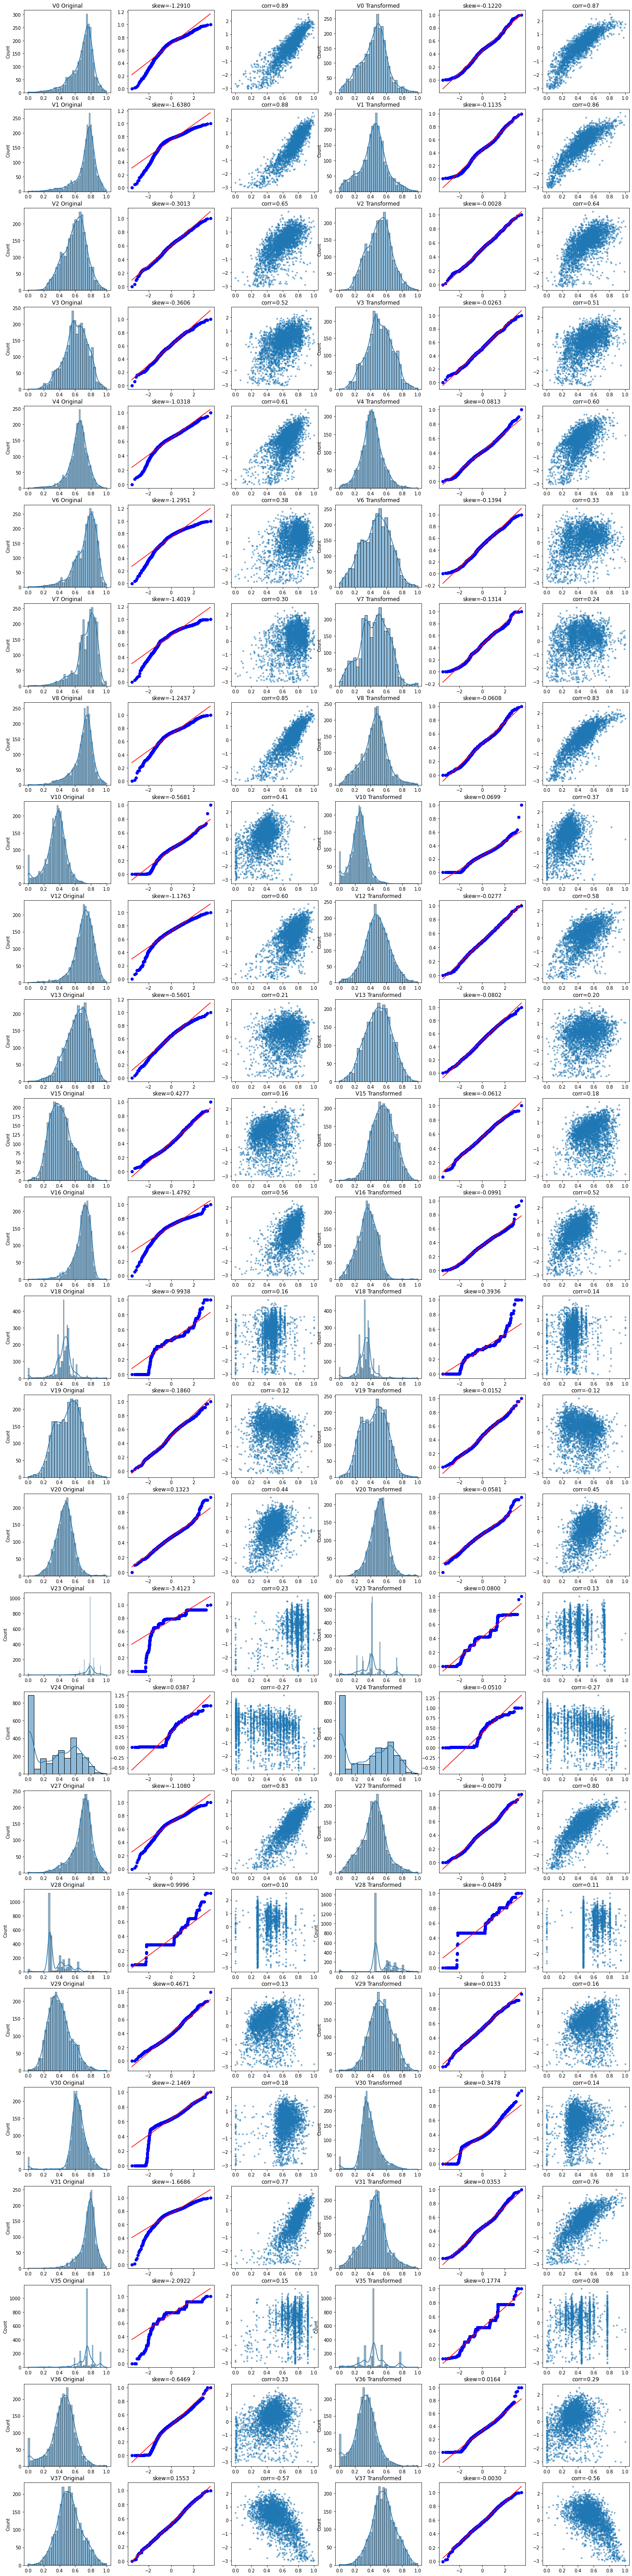

In [30]:
train_data_process = df_train[feature_list]
train_data_process = train_data_process[feature_list].apply(scale_minmax,axis=0)

total_features = len(feature_list)

feature_list_left = feature_list[0:total_features]
feature_list_right = feature_list[total_features:]
train_data_process = pd.concat([train_data_process, df_train['target']], axis=1)

fcols = 6
frows = len(feature_list_left)
plt.figure(figsize=(4 * fcols, 4 * frows))
i = 0

for var in feature_list_left:
    dat = train_data_process[[var, 'target']].dropna()
    
    i+=1
    plt.subplot(frows, fcols, i)
    sns.histplot(dat[var], kde=True)
    plt.title(var + ' Original')
    plt.xlabel('')
    
    i+=1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(dat[var], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
    
    i+=1
    plt.subplot(frows, fcols, i)
    plt.plot(dat[var], dat['target'], '.', alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
    
    i+=1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna() + 1)
    trans_var = scale_minmax(trans_var)
    sns.histplot(trans_var, kde=True)
    plt.title(var + ' Transformed')
    plt.xlabel('')
    
    i+=1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(trans_var, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
    
    i+=1
    plt.subplot(frows, fcols, i)
    plt.plot(trans_var, dat['target'], '.', alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var, dat['target'])[0][1]))

## PCA处理

利用PCA方法去除数据的多重共线性，并进行降维。PCA处理后可保持90%的信息,并与处理前测数据对比：

In [31]:
from sklearn.decomposition import PCA

n_components = 0.9

# 参数说明
# - n_components：这个参数可以帮我们指定希望PCA降维后的特征维度数目。
#   - 默认值。即不输入n_components，此时 n_components=min(样本数，特征数)。
#   - 指定降维到的维度数目，n_components >= 1
#   - 指定主成分的方差和所占的最小比例阈值，让PCA类自己去根据样本特征方差来决定降维到的维度数。0 < n_components < 1 and svd_solver == 'full' 
#   - 用MLE算法根据特征的方差分布情况自己去选择一定数量的主成分特征来降维。 n_components = "mle"
pca = PCA(n_components = n_components)

# 注意，这里的 `new_train_pca_90` 是一个 numpy.ndarray
new_train_pca_90 = pca.fit_transform(df_train.iloc[:,0:-1])
# 注意，这里的 `new_test_pca_90` 是一个 numpy.ndarray
new_test_pca_90 = pca.transform(df_test)

# 拼接一个完整数据集。 注意，因为使用了PCA进行降维，现在得到的数据与原来的数据并不相同，是不同的空间，所以要给新的数据指定新的特征名
new_train_pca_90 = pd.DataFrame(new_train_pca_90, columns=['F-{}'.format(x) for x in range(new_train_pca_90.shape[1])])
new_test_pca_90 = pd.DataFrame(new_test_pca_90, columns=['F-{}'.format(x) for x in range(new_test_pca_90.shape[1])])
new_train_pca_90['target'] = df_train['target']

display(new_train_pca_90.describe())
display(df_train.describe())

F-0           F-1           F-2           F-3           F-4  \
count  2.814000e+03  2.814000e+03  2.814000e+03  2.814000e+03  2.814000e+03   
mean  -2.020022e-17  5.050055e-18 -4.040044e-17 -5.302558e-17 -2.020022e-17   
std    3.806163e-01  3.394363e-01  2.125155e-01  1.976709e-01  1.673482e-01   
min   -9.173385e-01 -8.633317e-01 -7.622037e-01 -7.348879e-01 -4.523848e-01   
25%   -2.505078e-01 -2.521028e-01 -1.339062e-01 -1.211928e-01 -1.235123e-01   
50%   -2.826593e-02 -1.751845e-02 -1.025596e-02 -4.913170e-03 -9.979541e-04   
75%    1.926471e-01  2.281220e-01  1.189953e-01  1.087941e-01  1.097405e-01   
max    1.692277e+00  1.333551e+00  1.223782e+00  9.115599e-01  8.642171e-01   

       ...           F-7           F-8           F-9          F-10  \
count  ...  2.814000e+03  2.814000e+03  2.814000e+03  2.814000e+03   
mean   ...  2.651279e-17 -1.262514e-18  1.262514e-17  5.050055e-18   
std    ...  1.359235e-01  1.202309e-01  1.186404e-01  1.124082e-01   
min    ... -5.108911e-01 -4.723215e-01 -5.487781e-01 -4.474813e-01   
25%    ... -8.619770e-02 -7.265411e-02 -6.430528e-02 -7.454540e-02   
50%    ...  9.453044e-03 -4.795403e-03 -1.060529e-03 -9.538713e-04   
75%    ...  9.203699e-02  6.903750e-02  6.620780e-02  7.079255e-02   
max    ...  5.944318e-01  5.766929e-01  5.840413e-01  4.549175e-01   

            target  
count  2742.000000  
mean      0.126587  
std       0.972656  
min      -3.044922  
25%      -0.343262  
50%       0.315430  
75%       0.786133  
max       2.503906  

[8 rows x 12 columns]

V0           V1           V2           V3           V4  ...  \
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  ...   
mean      0.692871     0.737793     0.596191     0.607910     0.640625  ...   
std       0.142578     0.132446     0.144653     0.150635     0.119080  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.630859     0.700195     0.500732     0.516724     0.587891  ...   
50%       0.728516     0.767090     0.611084     0.612549     0.653320  ...   
75%       0.784668     0.813477     0.694824     0.714844     0.712402  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V31          V35          V36          V37       target  
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  
mean      0.762695     0.734863     0.443115     0.525391     0.134155  
std       0.108765     0.121948     0.159546     0.152588     0.967285  
min       0.000000     0.000000     0.000000     0.000000    -3.044922  
25%       0.724609     0.683350     0.368652     0.425415    -0.322998  
50%       0.782715     0.755859     0.459717     0.517822     0.319092  
75%       0.825684     0.785645     0.543945     0.619995     0.786865  
max       1.000000     1.000000     1.000000     1.000000     2.503906  

[8 rows x 27 columns]

除了PCA类以外，最常用的PCA相关类还有`KernelPCA`类，在原理篇我们也讲到了，它主要用于非线性数据的降维，需要用到核技巧。

另外一个常用的PCA相关类是`IncrementalPCA`类，它主要是为了解决单机内存限制的。有时候我们的样本量可能是上百万+，维度可能也是上千，直接去拟合数据可能会让内存爆掉， 此时我们可以用`IncrementalPCA`类来解决这个问题。`IncrementalPCA`先将数据分成多个`batch`，然后对每个`batch`依次递增调用`partial_fit`函数，这样一步步的得到最终的样本最优降维。

此外还有`SparsePCA`和`MiniBatchSparsePCA`。他们和上面讲到的PCA类的区别主要是使用了`L1`的正则化，这样可以将很多非主要成分的影响度降为0，这样在PCA降维的时候我们仅仅需要对那些相对比较主要的成分进行PCA降维，避免了一些噪声之类的因素对我们PCA降维的影响。`SparsePCA`和`MiniBatchSparsePCA`之间的区别则是`MiniBatchSparsePCA`通过使用一部分样本特征和给定的迭代次数来进行PCA降维，以解决在大样本时特征分解过慢的问题，当然，代价就是PCA降维的精确度可能会降低。使用`SparsePCA`和`MiniBatchSparsePCA`需要对`L1`正则化参数进行调参。

PCA保留16个主成分：

In [32]:
pca = PCA(n_components = 16)

# 注意，这里的 `new_train_pca_16` 是一个 numpy.ndarray
new_train_pca_16 = pca.fit_transform(df_train.iloc[:,0:-1])
# 注意，这里的 `new_test_pca_16` 是一个 numpy.ndarray
new_test_pca_16 = pca.transform(df_test)

# 拼接一个完整数据集。 注意，因为使用了PCA进行降维，现在得到的数据与原来的数据并不相同，是不同的空间，所以要给新的数据指定新的特征名
new_train_pca_16 = pd.DataFrame(new_train_pca_16, columns=['F-{}'.format(x) for x in range(new_train_pca_16.shape[1])])
new_test_pca_16 = pd.DataFrame(new_test_pca_16, columns=['F-{}'.format(x) for x in range(new_test_pca_16.shape[1])])
new_train_pca_16['target'] = df_train['target']

display(new_train_pca_16.describe())
display(df_train.describe())

F-0          F-1           F-2           F-3           F-4  \
count  2814.000000  2814.000000  2.814000e+03  2.814000e+03  2.814000e+03   
mean      0.000000     0.000000 -4.040044e-17 -5.681312e-17 -1.010011e-17   
std       0.380616     0.339436  2.125155e-01  1.976709e-01  1.673482e-01   
min      -0.917339    -0.863332 -7.622037e-01 -7.348879e-01 -4.523848e-01   
25%      -0.250508    -0.252103 -1.339062e-01 -1.211928e-01 -1.235123e-01   
50%      -0.028266    -0.017518 -1.025596e-02 -4.913170e-03 -9.979541e-04   
75%       0.192647     0.228122  1.189953e-01  1.087941e-01  1.097405e-01   
max       1.692277     1.333551  1.223782e+00  9.115599e-01  8.642171e-01   

       ...          F-12          F-13          F-14          F-15  \
count  ...  2.814000e+03  2.814000e+03  2.814000e+03  2.814000e+03   
mean   ...  3.535038e-17 -6.312569e-19 -2.856437e-17 -1.862208e-17   
std    ...  9.018330e-02  8.072873e-02  7.740186e-02  6.053244e-02   
min    ... -2.862067e-01 -3.517945e-01 -2.737022e-01 -3.895259e-01   
25%    ... -5.876958e-02 -4.647209e-02 -4.801981e-02 -2.200801e-02   
50%    ... -5.620358e-03  1.606591e-04 -3.522815e-03  9.657174e-04   
75%    ...  5.389384e-02  4.654658e-02  4.347096e-02  2.367462e-02   
max    ...  3.931363e-01  4.659279e-01  4.639164e-01  3.999985e-01   

            target  
count  2742.000000  
mean      0.126587  
std       0.972656  
min      -3.044922  
25%      -0.343262  
50%       0.315430  
75%       0.786133  
max       2.503906  

[8 rows x 17 columns]

V0           V1           V2           V3           V4  ...  \
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  ...   
mean      0.692871     0.737793     0.596191     0.607910     0.640625  ...   
std       0.142578     0.132446     0.144653     0.150635     0.119080  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.630859     0.700195     0.500732     0.516724     0.587891  ...   
50%       0.728516     0.767090     0.611084     0.612549     0.653320  ...   
75%       0.784668     0.813477     0.694824     0.714844     0.712402  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V31          V35          V36          V37       target  
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  
mean      0.762695     0.734863     0.443115     0.525391     0.134155  
std       0.108765     0.121948     0.159546     0.152588     0.967285  
min       0.000000     0.000000     0.000000     0.000000    -3.044922  
25%       0.724609     0.683350     0.368652     0.425415    -0.322998  
50%       0.782715     0.755859     0.459717     0.517822     0.319092  
75%       0.825684     0.785645     0.543945     0.619995     0.786865  
max       1.000000     1.000000     1.000000     1.000000     2.503906  

[8 rows x 27 columns]

## 模型训练

### 导入必要的库

首先导入一些python工具包，用于模型拟合和性能评价。

In [33]:
from sklearn.linear_model import LinearRegression # 线性回归
from sklearn.neighbors import KNeighborsRegressor # K近邻回归
from sklearn.tree import DecisionTreeRegressor # 决策树回归
from sklearn.ensemble import RandomForestRegressor # 随机森林回归
from sklearn.svm import SVR # 支持向量机回归
import lightgbm as lgb # LightGBM模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error # 评价指标

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

### 切分数据

对训练集进行切分，得到80%的训练集和20%的验证集。

In [34]:
train_test_size = 0.8

new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_train_pca_16.columns]
target = new_train_pca_16['target']

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=(1 - train_test_size), random_state=0)

### 多元线性回归

- 优点：模型简单，部署方便，回归权重可以用于结果分析：训练快。
- 缺点：精度低，特征存在一定的共线性问题。
- 使用技巧：需要进行归一化处理，建议进行一定的特征选择，尽量避免高度相关的特征同时存在。
- 本题结果：效果一般。适合分析使用。

In [35]:
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:", score)

LinearRegression: 2.2456906428145725e-31


### K近邻回归

- 优点：模型简单，易于理解，对于数据量小的情况方便快捷，可视化方便。
- 缺点：计算量大，不适合数据量大的情况：需要调参数。
- 使用技巧：特征需要归一化，重要的特征可以适当加一定比例的权重。
- 本题结果：效果一般。

In [36]:
clf = KNeighborsRegressor(n_neighbors=8)
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("KNeighborsRegressor:", score)

KNeighborsRegressor: 0.006016


### 随机森林回归

- 优点：使用方便，特征无需做过多变换；精度较高；模型并行训练快
- 缺点：结果不容易解释
- 使用技巧：参数调节，提高精度
- 本题结果：比较适合

In [37]:
clf = RandomForestRegressor(n_estimators=200)
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:", score)

RandomForestRegressor: 0.00010103483568161508


### LGB模型回归

- 优点：精度高
- 缺点：训练时间长，模型复杂
- 使用技巧：有效的验证集防止过拟合；参数搜索。
- 本题结果：适合。

In [38]:
clf = lgb.LGBMRegressor(
    learning_rate = 0.01,
    max_depth = -1,
    n_estimators = 5000,
    boosting_type = 'gbdt',
    random_state = 2019,
    objective='regression',
)
clf.fit(X=train_data, y=train_target, eval_metric='MSE')
score = mean_squared_error(test_target, clf.predict(test_data))
print("lightGBM:", score)

lightGBM: 0.0008127811353844308


### 模型正则化

模型正常拟合的情况

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

poly = PolynomialFeatures(3)
train_data_poly  = poly.fit_transform(train_data)
test_data_poly  = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter = 1000, tol = 1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:", score_train)
print("SGDRegressor test MSE:", score_test)

SGDRegressor train MSE: 0.00035467880842006714
SGDRegressor test MSE: 0.000644938517036932


采用L2范数正则化处理模型，代码如下：

In [40]:
poly = PolynomialFeatures(3)
train_data_poly  = poly.fit_transform(train_data)
test_data_poly  = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty='L2', alpha=0.0001)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:", score_train)
print("SGDRegressor test MSE:", score_test)

SGDRegressor train MSE: 0.0003996349303593571
SGDRegressor test MSE: 0.0005104499134864819


采用L1范数正则化处理模型，代码如下：

In [41]:
poly = PolynomialFeatures(3)
train_data_poly  = poly.fit_transform(train_data)
test_data_poly  = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty='L1', alpha=0.00001)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:", score_train)
print("SGDRegressor test MSE:", score_test)

SGDRegressor train MSE: 0.00028909446447827783
SGDRegressor test MSE: 0.0005308064270764102


采用ElasticNet正则化处理模型，代码如下：

In [42]:
poly = PolynomialFeatures(3)
train_data_poly  = poly.fit_transform(train_data)
test_data_poly  = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty='elasticnet',  l1_ratio = 0.9, alpha=0.00001)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:", score_train)
print("SGDRegressor test MSE:", score_test)

SGDRegressor train MSE: 0.0003633240424177626
SGDRegressor test MSE: 0.0007365662486358575


## 验证

### 模型交叉验证

使用简单交叉验证并切分数据，训练集和验证集为8：2。

In [43]:
# 切分数据，训练集和验证集为8：2
train_data, test_data, train_target, test_target = train_test_split(train, target, test_size = 0.2, random_state=0)

clf = SGDRegressor(max_iter = 1000, tol = 1e-3)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:", score_train)
print("SGDRegressor test MSE:", score_test)

SGDRegressor train MSE: 2.657555697941397e-05
SGDRegressor test MSE: 2.597634036025974e-05


### K折交叉验证
使用K折交叉验证方法对模型进行交叉验证，K = 5， 代码如下：

In [44]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data, test_data, train_target, test_target = train.values[train_index], train.values[test_index], target[train_index], target[test_index]
    clf = SGDRegressor(max_iter = 1000, tol = 1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k,"折","SGDRegressor train MSE:", score_train)
    print(k,"折","SGDRegressor test MSE:", score_test, '\n')

0 折 SGDRegressor train MSE: 2.59475740841674e-05
0 折 SGDRegressor test MSE: 2.385839029661307e-05 

1 折 SGDRegressor train MSE: 2.5608383108445273e-05
1 折 SGDRegressor test MSE: 4.55397674326469e-05 

2 折 SGDRegressor train MSE: 3.423941327120465e-05
2 折 SGDRegressor test MSE: 3.659100817982928e-05 

3 折 SGDRegressor train MSE: 3.73576363362646e-05
3 折 SGDRegressor test MSE: 4.9596712484486886e-05 

4 折 SGDRegressor train MSE: 1.6950530001761058e-05
4 折 SGDRegressor test MSE: 2.0687602151014574e-05 



### 留一法交叉验证

使用留一法交叉验证对模型进行交叉验证，代码如下：

In [45]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data, test_data, train_target, test_target = train.values[train_index], train.values[test_index], target[train_index], target[test_index]
    clf = SGDRegressor(max_iter = 1000, tol = 1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k,"个","SGDRegressor train MSE:", score_train)
    print(k,"个","SGDRegressor test MSE:", score_test, '\n')
    if k >= 9:
        break

0 个 SGDRegressor train MSE: 1.183964629207735e-05
0 个 SGDRegressor test MSE: 1.5807098916293264e-07 

1 个 SGDRegressor train MSE: 1.0724417411248626e-05
1 个 SGDRegressor test MSE: 1.784382022952481e-06 

2 个 SGDRegressor train MSE: 1.5933962984785996e-05
2 个 SGDRegressor test MSE: 1.3808632997603458e-06 

3 个 SGDRegressor train MSE: 1.9105593177713936e-05
3 个 SGDRegressor test MSE: 3.857577494372753e-06 

4 个 SGDRegressor train MSE: 1.636564393692313e-05
4 个 SGDRegressor test MSE: 1.4216171315732184e-05 

5 个 SGDRegressor train MSE: 1.8354230845674594e-05
5 个 SGDRegressor test MSE: 4.851196922267651e-07 

6 个 SGDRegressor train MSE: 1.5622015347032185e-05
6 个 SGDRegressor test MSE: 2.7678546533855276e-07 

7 个 SGDRegressor train MSE: 2.061218911031569e-05
7 个 SGDRegressor test MSE: 3.323700973775362e-07 

8 个 SGDRegressor train MSE: 1.1229568329733254e-05
8 个 SGDRegressor test MSE: 2.429017719264357e-07 

9 个 SGDRegressor train MSE: 1.5056139825187935e-05
9 个 SGDRegressor test MSE: 1.0

### 留P法交叉验证

使用留P法交叉验证对模型进行交叉验证，代码如下：

In [46]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data, test_data, train_target, test_target = train.values[train_index], train.values[test_index], target[train_index], target[test_index]
    clf = SGDRegressor(max_iter = 1000, tol = 1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k,"10个","SGDRegressor train MSE:", score_train)
    print(k,"10个","SGDRegressor test MSE:", score_test, '\n')
    if k >= 9:
        break

0 10个 SGDRegressor train MSE: 1.8154135534117017e-05
0 10个 SGDRegressor test MSE: 1.2605460452628507e-06 

1 10个 SGDRegressor train MSE: 2.0894398154987038e-05
1 10个 SGDRegressor test MSE: 9.575950049433134e-06 

2 10个 SGDRegressor train MSE: 1.6765126737218684e-05
2 10个 SGDRegressor test MSE: 4.164682685080012e-06 

3 10个 SGDRegressor train MSE: 1.4447003229378523e-05
3 10个 SGDRegressor test MSE: 1.466139954933904e-05 

4 10个 SGDRegressor train MSE: 1.485254115037066e-05
4 10个 SGDRegressor test MSE: 3.93623354910698e-06 

5 10个 SGDRegressor train MSE: 1.9833395565429185e-05
5 10个 SGDRegressor test MSE: 6.42191953877885e-06 

6 10个 SGDRegressor train MSE: 1.6743752352066506e-05
6 10个 SGDRegressor test MSE: 2.8335059430523554e-05 

7 10个 SGDRegressor train MSE: 1.58879696467626e-05
7 10个 SGDRegressor test MSE: 4.4800508590513855e-06 

8 10个 SGDRegressor train MSE: 2.671395679969222e-05
8 10个 SGDRegressor test MSE: 1.5303523938975144e-05 

9 10个 SGDRegressor train MSE: 2.1540294535682025

## 调参

### 模型超参空间及调参

使用数据训练随机森林模型，采用网格搜索方法调参，代码如下：

In [47]:
from sklearn.model_selection import GridSearchCV

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()

parameters = {'n_estimators':[50, 100, 200],'max_depth':[1, 2, 3]}

clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor GridSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE:    0.021379704776587447


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

使用数据训练随机森林模型，采用随机参数优化方法调参，代码如下：

In [48]:
from sklearn.model_selection import RandomizedSearchCV

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()

parameters = {'n_estimators':[50, 100, 200, 300],'max_depth':[1, 2, 3, 4, 5]}

clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE:    0.0005576643605533876


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

使用数据训练LGB模型，采用网格搜索方法调参，代码如下：

In [49]:
clf = lgb.LGBMRegressor(num_leaves=31)

parameters = {'learning_rate': [0.01, 0.1, 1],'n_estimators': [20, 40]}

clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)

print('Best parameters found by grid search are:', clf.best_params_)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("LGBMRegressor RandomizedSearchCV test MSE:   ", score_test)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}
LGBMRegressor RandomizedSearchCV test MSE:    0.0010777298678989486


### 学习曲线和验证曲线

TODO 绘制数据训练SGDRegressor模型的学习曲线。

TODO 绘制数据训练SGDRegressor模型的验证曲线。

## 特征优化

TODO 自动构造特征函数

## 模型融合